In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import mean_squared_error

## 载入数据

In [63]:
glc=pd.read_excel('Data_glc_SNV.xlsx')
#y=glc['glucose']
x=glc.iloc[:,:3251]
y = glc.iloc[:,3251]
y

0      3.33430
1      4.16620
2      2.72260
3      2.05790
4      1.50860
        ...   
237    0.49969
238    0.47519
239    0.35779
240    0.30494
241    0.27220
Name: glucose, Length: 242, dtype: float64

In [47]:
##数据归一化处理
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaler=scaler.transform(x)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)
x_test_scaler

array([[ 2.034236  ,  2.00727061,  2.00114069, ...,  1.83828238,
         1.88251824,  1.86395251],
       [ 0.19420102,  0.23622069,  0.22421679, ...,  1.45358654,
         1.37399184,  1.32476289],
       [ 0.21974017,  0.22404852,  0.20596072, ...,  1.47388848,
         1.44827098,  1.38226613],
       ...,
       [ 0.39608192,  0.38228666,  0.37756775, ...,  1.50356056,
         1.46982751,  1.45627255],
       [ 1.60371889,  1.5775932 ,  1.54108779, ...,  1.21308656,
         1.20959082,  1.25900806],
       [ 0.12123202,  0.1631877 ,  0.13658766, ..., -0.32361457,
        -0.32014385, -0.31188775]])

## 超参数调整1（特征提取前）

In [4]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
#Ridge回归
rid_cv = RidgeCV(alphas=np.arange(1000,1500,1),cv=10).fit(x_train_scaler, y_train)
rid_cv.score(x_test_scaler,y_test)

1000

In [ ]:
rid_cv.alpha_

In [5]:
#lasso回归
lass_cv= LassoCV(alphas=[1e-3, 1e-2, 1e-1, 0.5,1,1.5,2],cv=10)
lass_cv.fit(x_train_scaler,y_train)
lass_cv.score(x_test_scaler,y_test)

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.44995506107693, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.33457023102022, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.17460719356921, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.421731828075252, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.6523036725521, tolerance: 4.1281800446278805
  model = cd_fast.enet_coordinate_descent(


0.1

In [6]:
lass_cv.alpha_

0.1

In [7]:
#弹性网
elas_cv= ElasticNetCV(l1_ratio=[1e-3,1e-2,1e-1, .5, .7,.75,.8, .85,.9, .95, .99, 1,1.5,1.8,2,2.5],alphas=[1e-3, 1e-2, 1e-1,0.5, 1,1.5,2],cv=10) 
elas_cv.fit(x_train_scaler,y_train)
elas_cv.score(x_test_scaler,y_test)
#elas_cv.alpha_
#elas_cv.l1_ratio_

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6635.636060483879, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5907.294067851759, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5012.545697559119, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5903.162065687984, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5070.14542488244, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3652.856040768787, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4022.1607697475056, tolerance: 3.508011350667058
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2831.5516624073293, tolerance: 3.508011350667058
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1026.9472950637391, tolerance: 3.508011350667058
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3524.0439886634776, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367.7557461998533, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.98967010674238, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.7804086384551, tolerance: 3.795040976554288
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.05132918810972, tolerance: 3.795040976554288
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.151081004957447, tolerance: 3.795040976554288
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.94445252685793, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.68734677763167, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.62937346673425, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.204374031485063, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953.5708375711656, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.24047621129284, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348.30837558843814, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.39026949974686, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862.0361002527288, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235.0081050639255, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.50166141068965, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.521364654427313, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246.49273572683245, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.5618841156045, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.64342341501833, tolerance: 3.9358289534518933
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.57800211950497, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.68127120718418, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198.1376055386277, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.0277633749065, tolerance: 3.888014008558523
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1412.612248398516, tolerance: 3.888014008558523
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.49560472091122, tolerance: 3.888014008558523
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160.95938256052514, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.274399968918452, tolerance: 3.8056483406039154
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.681516905633544, tolerance: 3.8923377844147473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.13055023586568, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.617755481086782, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.054127562902067, tolerance: 3.9358289534518933
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.693766803518727, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898.5875836870584, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.00894872486882, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.104811171177452, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724.0544515753136, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.48921409596642, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.946121314382662, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.00424150724064, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.5014298311009, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.17460719356921, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445.3226254204924, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.46821471260378, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 3.500368435791484
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1143: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 3.8570717169785094
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1143: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 3.508011350667058
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 3.387832717850441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 3.54901300926562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1143: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(

0.7879241892098598

In [8]:
print(elas_cv.alpha_)
print(elas_cv.l1_ratio_)

0.1
0.1


In [9]:
#K近邻
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()#k近邻
weights=['uniform','distance']
n_neighbors=np.arange(20)
p=np.arange(10)
param_grid=dict(weights=weights,n_neighbors=n_neighbors,p=p)
grid_cv1=GridSearchCV(neigh,param_grid,cv=5)
grid_cv1.fit(x_train_scaler,y_train)
pd.DataFrame(grid_cv1.cv_results_)

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.47443052 0.47443052
 0.40865269 0.40865269 0.40743181 0.40743181 0.2264052  0.2264052
 0.22157817 0.22157817 0.31553056 0.31553056 0.31550631 0.31550631
 0.31406237 0.31406237 0.31321769 0.31321769        nan        nan
 0.47675878 0.4834796  0.53479933 0.54467958 0.55289133 0.56126548
 0.52435664 0.53611404 0.52432068 0.53514679 0.56540021 0.57816975
 0.57700104 0.58850315 0.57708965 0.58669863 0.57596324 0.58443815
        nan        nan 0.46944288 0.48982088 0.52284266 0.54943446
 0.57482883 0.59546084 0.56905578 0.59245015 0.57351711 0.60141013
 0.50068503 0.55617643 0.50815241 0.56705829 0.58287994 0.61

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.002594      0.000477         0.000000        0.000000   
1         0.002399      0.000484         0.000000        0.000000   
2         0.002387      0.000480         0.000000        0.000000   
3         0.002194      0.000396         0.000000        0.000000   
4         0.002187      0.000405         0.000000        0.000000   
..             ...           ...              ...             ...   
395       0.002803      0.000404         0.329823        0.004383   
396       0.002594      0.000478         0.334020        0.004744   
397       0.002183      0.000393         0.331573        0.004927   
398       0.002398      0.000484         0.334633        0.006293   
399       0.002388      0.000482         0.334572        0.006108   

    param_n_neighbors param_p param_weights  \
0                   0       0       uniform   
1                   0       0      distance   
2                   0       1       uniform   
3                   0       1      distance   
4                   0       2       uniform   
..                ...     ...           ...   
395                19       7      distance   
396                19       8       uniform   
397                19       8      distance   
398                19       9       uniform   
399                19       9      distance   

                                                params  split0_test_score  \
0     {'n_neighbors': 0, 'p': 0, 'weights': 'uniform'}                NaN   
1    {'n_neighbors': 0, 'p': 0, 'weights': 'distance'}                NaN   
2     {'n_neighbors': 0, 'p': 1, 'weights': 'uniform'}                NaN   
3    {'n_neighbors': 0, 'p': 1, 'weights': 'distance'}                NaN   
4     {'n_neighbors': 0, 'p': 2, 'weights': 'uniform'}                NaN   
..                                                 ...                ...   
395  {'n_neighbors': 19, 'p': 7, 'weights': 'distan...           0.562694   
396  {'n_neighbors': 19, 'p': 8, 'weights': 'uniform'}           0.491385   
397  {'n_neighbors': 19, 'p': 8, 'weights': 'distan...           0.549900   
398  {'n_neighbors': 19, 'p': 9, 'weights': 'uniform'}           0.498232   
399  {'n_neighbors': 19, 'p': 9, 'weights': 'distan...           0.553408   

     split1_test_score  split2_test_score  split3_test_score  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
395           0.740529           0.276985           0.494398   
396           0.667586           0.119285           0.444792   
397           0.734619           0.278565           0.517219   
398           0.676411           0.145912           0.442359   
399           0.737303           0.300872           0.514018   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0                  NaN              NaN             NaN              400  
1                  NaN              NaN             NaN              358  
2                  NaN              NaN             NaN              356  
3                  NaN              NaN             NaN              354  
4                  NaN              NaN             NaN              350  
..                 ...              ...             ...              ...  
395           0.274376         0.469796        0.177706              228  
396           0.255665         0.395743        0.190527              318  
397           0.281713         0.472403        0.173613              225  
398           0.257944         0.404172        0.185742              309  
399           0.283127         0.477746        0.169453              211  

[400 rows x 16 c

In [10]:
print(grid_cv1.best_estimator_)
print(grid_cv1.best_score_)
print(grid_cv1.best_params_)

KNeighborsRegressor(n_neighbors=4, p=7, weights='distance')
0.6182771105923603
{'n_neighbors': 4, 'p': 7, 'weights': 'distance'}


In [11]:
#支持向量机
from sklearn import svm
clf = svm.SVR()
kernel=['linear','rbf','poly']
C=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19,20,21,22,23,24,25]
gamma=[0.00001, 0.0001, 0.001, 0.1, 1, 10]
degree=[1,2,3,4,5]
parameters=dict(kernel=kernel,C=C,gamma=gamma,degree=degree)
grid_cv2=GridSearchCV(clf,parameters,cv=5)
grid_cv2.fit(x_train_scaler,y_train)
pd.DataFrame(grid_cv2.cv_results_)

SVR(C=3, degree=1, gamma=0.1, kernel='poly')
0.7061101193712617
{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [12]:
print(grid_cv2.best_estimator_)
print(grid_cv2.best_score_)
print(grid_cv2.best_params_)

SVR(C=3, degree=1, gamma=0.1, kernel='poly')
0.7061101193712617
{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [13]:
#多层感知器
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()

hidden_layer_sizes=np.arange(50,150,10)
activation=['logistic','tanh','relu']
solver=['lbfgs','sgd','adam']
parameters=dict(hidden_layer_sizes=hidden_layer_sizes,activation=activation,solver=solver)
from sklearn.model_selection import GridSearchCV 
grid_cv3=GridSearchCV(mlp,parameters,cv=5)
grid_cv3.fit(x_train_scaler,y_train)
pd.DataFrame(grid_cv3.cv_results_)

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_

D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
D:\Coding\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "D:\Coding\anacond

D:\Coding\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_regr

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
D:\Coding\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_select

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
D:\Coding\anaconda\lib

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
D:\Coding\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\utils

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.546313      0.220750         0.001795        0.000399   
1        1.275388      0.088031         0.000997        0.001092   
2        1.669531      0.040551         0.000997        0.000631   
3        3.967386      0.071827         0.001596        0.000488   
4        1.398858      0.033784         0.001596        0.000489   
..            ...           ...              ...             ...   
85       0.407510      0.052979         0.001796        0.001163   
86       3.101902      0.389976         0.001197        0.000399   
87       9.145932      0.130652         0.001596        0.000489   
88       0.391951      0.086895         0.001197        0.000399   
89       3.399306      0.170586         0.000997        0.000631   

   param_activation param_hidden_layer_sizes param_solver  \
0          logistic                       50        lbfgs   
1          logistic                       50          sgd   
2          logistic                       50         adam   
3          logistic                       60        lbfgs   
4          logistic                       60          sgd   
..              ...                      ...          ...   
85             relu                      130          sgd   
86             relu                      130         adam   
87             relu                      140        lbfgs   
88             relu                      140          sgd   
89             relu                      140         adam   

                                               params  split0_test_score  \
0   {'activation': 'logistic', 'hidden_layer_sizes...           0.645712   
1   {'activation': 'logistic', 'hidden_layer_sizes...           0.715578   
2   {'activation': 'logistic', 'hidden_layer_sizes...          -0.182049   
3   {'activation': 'logistic', 'hidden_layer_sizes...           0.740348   
4   {'activation': 'logistic', 'hidden_layer_sizes...           0.705713   
..                                                ...                ...   
85  {'activation': 'relu', 'hidden_layer_sizes': 1...                NaN   
86  {'activation': 'relu', 'hidden_layer_sizes': 1...           0.783682   
87  {'activation': 'relu', 'hidden_layer_sizes': 1...           0.860902   
88  {'activation': 'relu', 'hidden_layer_sizes': 1...           0.596182   
89  {'activation': 'relu', 'hidden_layer_sizes': 1...           0.794537   

    split1_test_score  split2_test_score  split3_test_score  \
0        5.049631e-01           0.019347       5.000464e-01   
1        6.951812e-01           0.491641       7.601160e-01   
2        2.650103e-01           0.213260       9.009232e-02   
3        6.945650e-01          -0.047473       7.718513e-01   
4        7.297784e-01           0.563602       7.773377e-01   
..                ...                ...                ...   
85      -1.046159e+15                NaN      -2.577454e+03   
86       6.485438e-01           0.580426       8.613170e-01   
87       7.264695e-01           0.581400       8.417378e-01   
88       4.354926e-01                NaN      -1.230092e+90   
89       6.304173e-01           0.494322       8.569215e-01   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0        1.717888e-01         0.368371        0.233827               56  
1        3.988191e-01         0.612267        0.141080               23  
2       -1.998364e-01         0.037296        0.194909               80  
3        2.035322e-01         0.472565        0.332681               45  
4        3.775524e-01         0.630797        0.145280               12  
..                ...              ...             ...              ...  
85      -3.233524e+13              NaN             NaN               81  
86       2.089621e-01         0.616586        0.226407               21  
87       3.181107e-01         0.665724        0.200355                3  
88     -3.665119e+146              NaN      

In [14]:
print(grid_cv3.best_params_)
print(grid_cv3.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': 120, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=120, solver='lbfgs')


In [15]:
#梯进树
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
n_estimators=np.arange(50,150,10)
parameters=dict(n_estimators=n_estimators)
grid_cv4=GridSearchCV(reg,parameters,cv=5)
grid_cv4.fit(x_train_scaler,y_train)
pd.DataFrame(grid_cv4.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.859574      0.061852         0.000598    4.880379e-04   
1       3.427361      0.080256         0.000808    4.042307e-04   
2       3.951435      0.070680         0.000594    4.846515e-04   
3       4.480413      0.042101         0.000998    1.076850e-06   
4       5.040533      0.024479         0.000993    1.065024e-05   
5       5.603005      0.021987         0.000399    4.886945e-04   
6       6.174282      0.033048         0.000998    9.464947e-07   
7       6.808983      0.149833         0.000799    3.996675e-04   
8       7.352343      0.083536         0.000399    4.886944e-04   
9       7.878125      0.042325         0.000804    4.019569e-04   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.561703   
1                 60   {'n_estimators': 60}           0.501982   
2                 70   {'n_estimators': 70}           0.471038   
3                 80   {'n_estimators': 80}           0.475075   
4                 90   {'n_estimators': 90}           0.496220   
5                100  {'n_estimators': 100}           0.465775   
6                110  {'n_estimators': 110}           0.480781   
7                120  {'n_estimators': 120}           0.462196   
8                130  {'n_estimators': 130}           0.505160   
9                140  {'n_estimators': 140}           0.483701   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.476558           0.267938           0.637450           0.351503   
1           0.523697           0.266047           0.670022           0.340253   
2           0.524978           0.350753           0.629527           0.366702   
3           0.676828           0.162967           0.677338           0.404001   
4           0.219380           0.280440           0.650995           0.351280   
5           0.434873           0.209066           0.643322           0.389161   
6           0.311304           0.300559           0.667244           0.344842   
7           0.215237           0.174003           0.638324           0.324253   
8           0.465897           0.259814           0.635959           0.357332   
9           0.407730           0.336817           0.659943           0.401955   

   mean_test_score  std_test_score  rank_test_score  
0         0.459030        0.134730                4  
1         0.460400        0.142748                3  
2         0.468600        0.103298                2  
3         0.479242        0.191828                1  
4         0.399663        0.155915                9  
5         0.428439        0.139483                7  
6         0.420946        0.138960                8  
7         0.362803        0.170117               10  
8         0.444832        0.128453                6  
9         0.458029        0.111171                5

In [16]:
print(grid_cv4.best_params_)
print(grid_cv4.best_estimator_)

{'n_estimators': 80}
GradientBoostingRegressor(n_estimators=80)


In [17]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
reclf=RandomForestRegressor()
grid_cv5=GridSearchCV(reclf,parameters,cv=5)
grid_cv5.fit(x_train_scaler,y_train)
pd.DataFrame(grid_cv5.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.753165      0.090070         0.003590        0.000488   
1       4.462062      0.092396         0.004583        0.000485   
2       5.230204      0.122288         0.004394        0.000484   
3       5.917968      0.120105         0.005580        0.000495   
4       6.708658      0.114928         0.005979        0.000011   
5       7.404131      0.193923         0.007108        0.000233   
6       8.234436      0.177545         0.007193        0.000393   
7       8.962152      0.204416         0.007579        0.000810   
8       9.710610      0.193251         0.008389        0.000490   
9      10.423099      0.202298         0.009187        0.000738   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.609828   
1                 60   {'n_estimators': 60}           0.634629   
2                 70   {'n_estimators': 70}           0.656434   
3                 80   {'n_estimators': 80}           0.638504   
4                 90   {'n_estimators': 90}           0.630704   
5                100  {'n_estimators': 100}           0.624393   
6                110  {'n_estimators': 110}           0.595638   
7                120  {'n_estimators': 120}           0.664111   
8                130  {'n_estimators': 130}           0.626908   
9                140  {'n_estimators': 140}           0.637530   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.660791           0.193909           0.642578           0.326265   
1           0.678448           0.507785           0.675957           0.379862   
2           0.647603           0.373353           0.690110           0.343587   
3           0.648739           0.260548           0.597389           0.361487   
4           0.702366           0.316394           0.645758           0.347112   
5           0.638225           0.372546           0.604366           0.296024   
6           0.587310           0.340986           0.618506           0.301217   
7           0.650563           0.084351           0.671374           0.352637   
8           0.563892           0.179381           0.654967           0.354706   
9           0.556382           0.333149           0.627683           0.347041   

   mean_test_score  std_test_score  rank_test_score  
0         0.486674        0.190385                8  
1         0.575336        0.115798                1  
2         0.542217        0.150992                2  
3         0.501334        0.159565                5  
4         0.528467        0.162674                3  
5         0.507111        0.143576                4  
6         0.488731        0.137825                7  
7         0.484607        0.233352                9  
8         0.475971        0.181781               10  
9         0.500357        0.133889                6

In [18]:
print(grid_cv5.best_params_)
print(grid_cv5.best_estimator_)

{'n_estimators': 60}
RandomForestRegressor(n_estimators=60)


In [19]:
from sklearn.neighbors import KNeighborsRegressor
neigh =grid_cv1.best_estimator_#KNeighborsRegressor(n_neighbors=4, weights='distance')
        #KNeighborsRegressor(n_neighbors=4, weights='distance')#= KNeighborsRegressor(n_neighbors=3)#k近邻###########
from sklearn import svm
clf =grid_cv2.best_estimator_#svm.SVR(C=9, degree=1, gamma=0.0001)
    #svm.SVR(C=20, degree=1, gamma=0.0001)#= svm.SVR(C=100,degree=1)#支持向量机###########################################
from sklearn.neural_network import MLPRegressor
mlp=grid_cv3.best_estimator_#MLPRegressor(activation='logistic', hidden_layer_sizes=140)
#mlp=MLPRegressor(activation='logistic', hidden_layer_sizes=120, solver='lbfgs') #= MLPRegressor()#多层感知器###############################
from sklearn.ensemble import GradientBoostingRegressor
reg =grid_cv4.best_estimator_ #GradientBoostingRegressor(n_estimators=120)
    #GradientBoostingRegressor()#梯进树
from sklearn.ensemble import RandomForestRegressor
reclf=grid_cv5.best_estimator_#RandomForestRegressor()#随机深林

from sklearn.linear_model import Ridge
rdg=Ridge(alpha=1000)#岭回归#############################################################
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.1)#lasso回归#############################################################
from sklearn import linear_model
lin = linear_model.LinearRegression()#线性回归
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.1,l1_ratio=0.1)#弹性网#######################################################
from sklearn import linear_model
bay = linear_model.BayesianRidge()
from sklearn import linear_model
ard = linear_model.ARDRegression()
from sklearn.cross_decomposition import PLSRegression
pls= PLSRegression(n_components=4)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()#决策树

In [20]:
estimator=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('DecisionTreeRegressor',regressor),('Lasso',las),('MLPRegressor',mlp),('PLSRegression',pls),('ElasticNet',regr),('BayesianRidge',bay),('ARDRegression',ard)]
'''estimator1=[('Ridge',rdg),('Lasso',las),('LinearRegression',lin),('ElasticNet',regr)]#线性模型
estimator2=[('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('DecisionTreeRegressor',regressor)]#树类模型
estimator3=[('BayesianRidge',bay),('ARDRegression',ard)]#概率模型
estimator4=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('DecisionTreeRegressor',regressor),('Lasso',las),('MLPRegressor',mlp),('ElasticNet',regr),('BayesianRidge',bay),('ARDRegression',ard)]#不包含PLS'''

"estimator1=[('Ridge',rdg),('Lasso',las),('LinearRegression',lin),('ElasticNet',regr)]#线性模型\nestimator2=[('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('DecisionTreeRegressor',regressor)]#树类模型\nestimator3=[('BayesianRidge',bay),('ARDRegression',ard)]#概率模型\nestimator4=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('DecisionTreeRegressor',regressor),('Lasso',las),('MLPRegressor',mlp),('ElasticNet',regr),('BayesianRidge',bay),('ARDRegression',ard)]#不包含PLS"

KNeighborsRegressor
0.6159396983737572
9.574362205445611
SVR
-0.2654844626434909
17.37955100871194
Ridge
0.007930377266441191
15.387966057239888
GradientBoostingRegressor
0.555560271052259
10.299510409007693
RandomForestRegressor
0.5360899303969602
10.52269647670952
DecisionTreeRegressor
0.30009304089190403
12.924992497157126
Lasso
0.2106854197949556
13.72572225069523
MLPRegressor
0.5763702604781482
10.055492911125864
PLSRegression
0.6384607158038645
9.289404851388445
ElasticNet
0.2442542815021388
13.430679685961692
BayesianRidge
0.8321988505438906
6.328599455760585
ARDRegression
0.5832021419644539
9.974080820973885


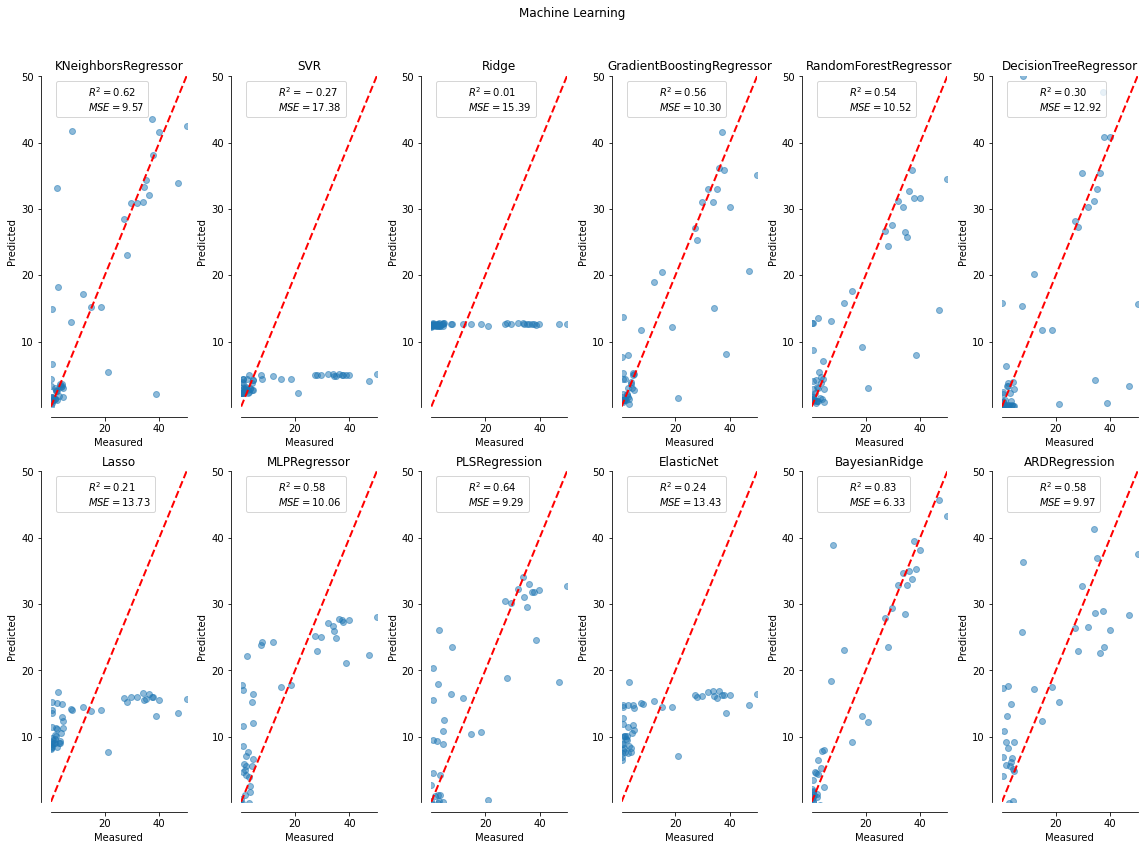

In [21]:
def mchine_learn(x_train,y_train,x_test,y_test,estimator,nun=1,mum=1,aa=6,bb=5):
    #estimator:元组形式，导入的机器学习算法。nun,mum：要绘多少图，几行即列,aa,bb:图像大小
    #求子模型于绘图
    estimator=estimator
    fig, axs = plt.subplots(nun, mum, figsize=(aa, bb))
    axs = np.ravel(axs)
    for ax,(name,estor)in zip(axs,estimator):
        estor.fit(x_train,y_train)
        y_pred=estor.predict(x_test)
        score=estor.score(x_test,y_test)
        mse=mean_squared_error(y_test,y_pred,squared=False)
        print(name)
        print(score)
        print(mse)
       #ravel返回一个连续的扁平数组。
        ax.plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                '--r', linewidth=2)
        ax.scatter(y_test, y_pred,alpha=0.5)
        #alpha与透明度有关
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #使封闭方框图变成开口的图形O-C
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))
        #左下角设置为开口到10
        ax.set_xlim([y_test.min(), y_test.max()])
        ax.set_ylim([y_test.min(), y_test.max()])
        #设置坐标轴的区间
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        #设置坐标轴的标签
        extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                              edgecolor='none', linewidth=0)
        #xy轴位置的锚定
        ax.legend([extra], [(r'$R^2={:.2f}$' + '\n' + r'$MSE={:.2f}$').format(score,mse)], loc='upper left')
        ax.set_title(name)
       #设定标题
        plt.suptitle('Machine Learning')
       #设置子标题
        plt.tight_layout()
       #调整子图之间和周围的填充。
        plt.subplots_adjust(top=0.9)
       #调整子块布局参数，top
    return

mchine_learn(x_train,y_train,x_test,y_test,estimator,nun=2,mum=6,aa=16,bb=12)

In [49]:
def mchine_learn_amount_scaler(x,y,estimator,number=100):
    #estimator:元组形式，导入的机器学习算法。nun,mum：要绘多少图，几行即列,aa,bb:图像大小,number:抽样次数
    #求子模型于绘图
    estimator=estimator
    num=[]
    k=0
    num.append((k,'estimator','Score','RMSE'))  
    for (name,estor)in estimator:
        k=k+1    
        ms=np.zeros((1,number))
        Sco=np.zeros((1,number))
        y_p=np.zeros((len(y_test),number))
        #208个测试数据集
        from sklearn.model_selection import train_test_split
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        for i in range(number):
            x1_train,x1_test,y1_train,y1_test=train_test_split(x,y)
            scaler.fit(x1_train)
            x1_train_scaler=scaler.transform(x1_train)
            x1_test_scaler=scaler.transform(x1_test)
            estor.fit(x1_train_scaler,y1_train)
            Sco[:,i]=estor.score(x1_test_scaler,y1_test)
            y_pr=estor.predict(x1_test_scaler).reshape(len(y1_test),)
            ms[:,i]=mean_squared_error(y1_test,y_pr,squared=False)
            y_p[:,i]=y_pr
        print(name)    
        print(Sco) 
       # y_pred=y_p.mean(axis=1)
        Score=Sco.mean()
        mse=ms.mean()        
        print(Score)
        print(mse)
        num.append((k,name,Score,mse))  
    return pd.DataFrame(num)

In [23]:
estimator2=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),('Lasso',las),('MLPRegressor',mlp),('ElasticNet',regr),('BayesianRidge',bay)]
from sklearn.ensemble import VotingRegressor
er1 = VotingRegressor(estimator2)

In [24]:
mchine_learn_amount_scaler(x,y,[("VotingRegressor",er1)],number=100)

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792.4586522960321, tolerance: 4.326860740962889
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2080.1201589917173, tolerance: 4.326860740962889
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1632.0556255691126, tolerance: 3.9176337816993794
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198.2049034489114, tolerance: 3.509583712370894
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.1089452132776, tolerance: 3.7422531488205397
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826.2562337087681, tolerance: 4.3818383054055206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 744.0149492436944, tolerance: 3.73148150841817
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915.0343224938122, tolerance: 3.73148150841817
  model = cd_fast.enet_coordinate_descent(
D:\Coding\ana

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922.759145893241, tolerance: 4.043089577651239
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1009.6982116401289, tolerance: 4.102386029116347
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1766.0361798353263, tolerance: 4.392816018759816
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787.6078506268468, tolerance: 3.5952970135815634
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.5415837656578, tolerance: 3.9549142275371505
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853.2499076650097, tolerance: 3.9549142275371505
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137.7717270062676, tolerance: 2.9343314668828193
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.6437241738504, tolerance: 3.9373784093107926
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.1791519315022, tolerance: 4.171792527294694
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.46881126718586, tolerance: 3.941783169150309
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.5720232543172, tolerance: 3.735354680643772
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1823.2664088886297, tolerance: 3.735354680643772
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1837.6308919178186, tolerance: 3.5385713378965304
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.98770084529997, tolerance: 3.8262907399041275
  model = cd_fast.enet_coordinate_descent(
D:\Codin

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2111.4177482157625, tolerance: 4.1064641303418465
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.3815214533865, tolerance: 4.005945010669512
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\

VotingRegressor
[[0.71319116 0.79903768 0.66093582 0.84621258 0.68419859 0.70656039
  0.79147193 0.71086483 0.64956702 0.67633344 0.74093316 0.77259879
  0.59258987 0.52620811 0.734009   0.77173815 0.8189229  0.67947551
  0.6136497  0.82825365 0.71271591 0.61719313 0.54012284 0.72330374
  0.73798787 0.79541086 0.43028626 0.72856991 0.65117206 0.64063737
  0.72738    0.79962437 0.43618592 0.72843212 0.87947993 0.85753405
  0.60922961 0.42204268 0.88273806 0.59362707 0.66567193 0.64080537
  0.77097212 0.83255951 0.58905256 0.69110559 0.73573159 0.77467965
  0.75558169 0.80200544 0.74498703 0.71011455 0.54988045 0.885662
  0.66751705 0.51090071 0.41207468 0.79267574 0.55693809 0.67165019
  0.61501491 0.67002992 0.79503081 0.69926106 0.7909624  0.53773204
  0.72781246 0.56517524 0.80857612 0.64973527 0.87294449 0.6847625
  0.81630177 0.74690077 0.63532309 0.76383364 0.81166681 0.75818488
  0.68649071 0.778587   0.61270423 0.77350712 0.88643717 0.7964856
  0.76740781 0.55673292 0.84611699 0

0                1        2         3
0  0        estimator    Score      RMSE
1  1  VotingRegressor  0.70692  8.594348

## 特征提取

In [50]:
#SelectFromModel
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
rid_cv = RidgeCV(alphas=[1e-3])
#pd.DataFrame(rid_cv.coef_).to_excel(title+'_rid.xlsx')
lasso_cv= LassoCV(alphas=[1e-3])
#pd.DataFrame(lass_cv.coef_).to_excel(title+'_lass.xlsx')
elas_cv= ElasticNetCV(l1_ratio=[.7],alphas=[1e-3])
#pd.DataFrame(elas_cv.coef_).to_excel(title+'_elas.xlsx')   
bay = linear_model.BayesianRidge()
#pd.DataFrame(bay.coef_).to_excel(title+'_bay.xlsx')
ard = linear_model.ARDRegression()

In [51]:
def select_feature_coef_figure_contact(estimator,title,xx,y,aum=35,bum=10,plus=0):
    #estimator用于特征选择的算法，xx:输入的特征集，y:标记
    from sklearn.feature_selection import SelectFromModel
    selector = SelectFromModel(estimator=estimator).fit(xx, y)
    rid_coef=selector.estimator_.coef_
    rid_score=np.abs(selector.estimator_.coef_)+plus
    indices=selector.get_support(indices=True)
    x_indices=glc.iloc[:,:3251].columns#te.iloc[:,4:3306]
    x_indices[selector.get_support(indices=True)]
    ##################################################################
    plt.figure(figsize=(aum,bum))
    #plt.figure(1)
    plt.clf()
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 30,
    }#设置横纵坐标的名称xlabel/ylabel以及对应字体大小格式
    plt.bar(x_indices, rid_score, width=.2,
            label=r'Univariate score ')
    plt.bar(x_indices[selector.get_support(indices=True)], rid_score[selector.get_support(indices=True)], width=.2,
            label=r'select_variate score')
    plt.legend(loc='upper left',fontsize=30)#用于给图像加图例,图例是集中于地图一角或一侧的地图上各种符号和颜色所代表内容与指标的说明，有助于更好的认识地图
    plt.title(title+"_feature selection",font2)
    plt.tick_params(axis='both',which='major',labelsize=20)#######  
    plt.xlabel('cm-1',font2)#
    plt.ylabel('Weight score',font2)#
    #plt.xlabel('Feature number',font2)
    plt.yticks(())
    plt.axis('tight')
    plt.show()
    ##################################################################################
    x_transform=selector.fit_transform(xx,y)
    print(x_indices[selector.get_support(indices=True)])
    aa=pd.DataFrame(x_transform)###########################################################################################################
    aa.columns=x_indices[selector.get_support(indices=True)]###########################################################################3
    '''X=np.array(te.iloc[:,3308])
    X=X.reshape(-1,1)
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    DataFrame(result)
    enc.get_feature_names()
    newdata = pd.concat([pd.DataFrame(x_transform),pd.DataFrame(result)],axis=1)
    newdata.head(100)
    x_new=newdata'''
    return aa


#######################################################################################################

def select_feature_important_figure_contact(estimator,title,xx,y,aum=35,bum=10,plus=3):
    #estimator用于特征选择的算法，xx:输入的特征集，y:标记
    from sklearn.feature_selection import SelectFromModel
    selector = SelectFromModel(estimator=estimator).fit(xx, y)
    rid_score = -np.log10(selector.estimator_.feature_importances_)
    rid_score=(1/rid_score)*50+plus
    indices=selector.get_support(indices=True)
    x_indices=glc.iloc[:,:3251].columns
    x_indices[selector.get_support(indices=True)]
  ################################################################################################
    plt.figure(figsize=(aum,bum))
    #plt.figure(1)
    plt.clf()
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 30,
    }#设置横纵坐标的名称xlabel/ylabel以及对应字体大小格式
    plt.bar(x_indices, rid_score, width=.2,
            label=r'Univariate score ')
    plt.bar(x_indices[selector.get_support(indices=True)], rid_score[selector.get_support(indices=True)], width=.2,
            label=r'select_variate score')
    plt.legend(loc='upper left',fontsize=30)#用于给图像加图例,图例是集中于地图一角或一侧的地图上各种符号和颜色所代表内容与指标的说明，有助于更好的认识地图
    plt.title(title+"_feature selection",font2)
    plt.tick_params(axis='both',which='major',labelsize=20)#######  
    plt.xlabel('cm-1',font2)#
    plt.ylabel('Weight score',font2)#
   # plt.xlabel('Feature number',font2)
    plt.yticks(())
    plt.axis('tight')
    plt.show()
    ##################################################################################
    x_transform=selector.fit_transform(xx,y)
    print(x_indices[selector.get_support(indices=True)])
    aa=pd.DataFrame(x_transform)###########################################################################################################
    aa.columns=x_indices[selector.get_support(indices=True)]###########################################################################3
    '''X=np.array(te.iloc[:,3308])
    X=X.reshape(-1,1)
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(categories='auto').fit(X)
    result = enc.transform(X).toarray()
    DataFrame(result)
    enc.get_feature_names()
    newdata = pd.concat([pd.DataFrame(x_transform),pd.DataFrame(result)],axis=1)
    newdata.head(100)
    x_new=newdata'''
    return aa

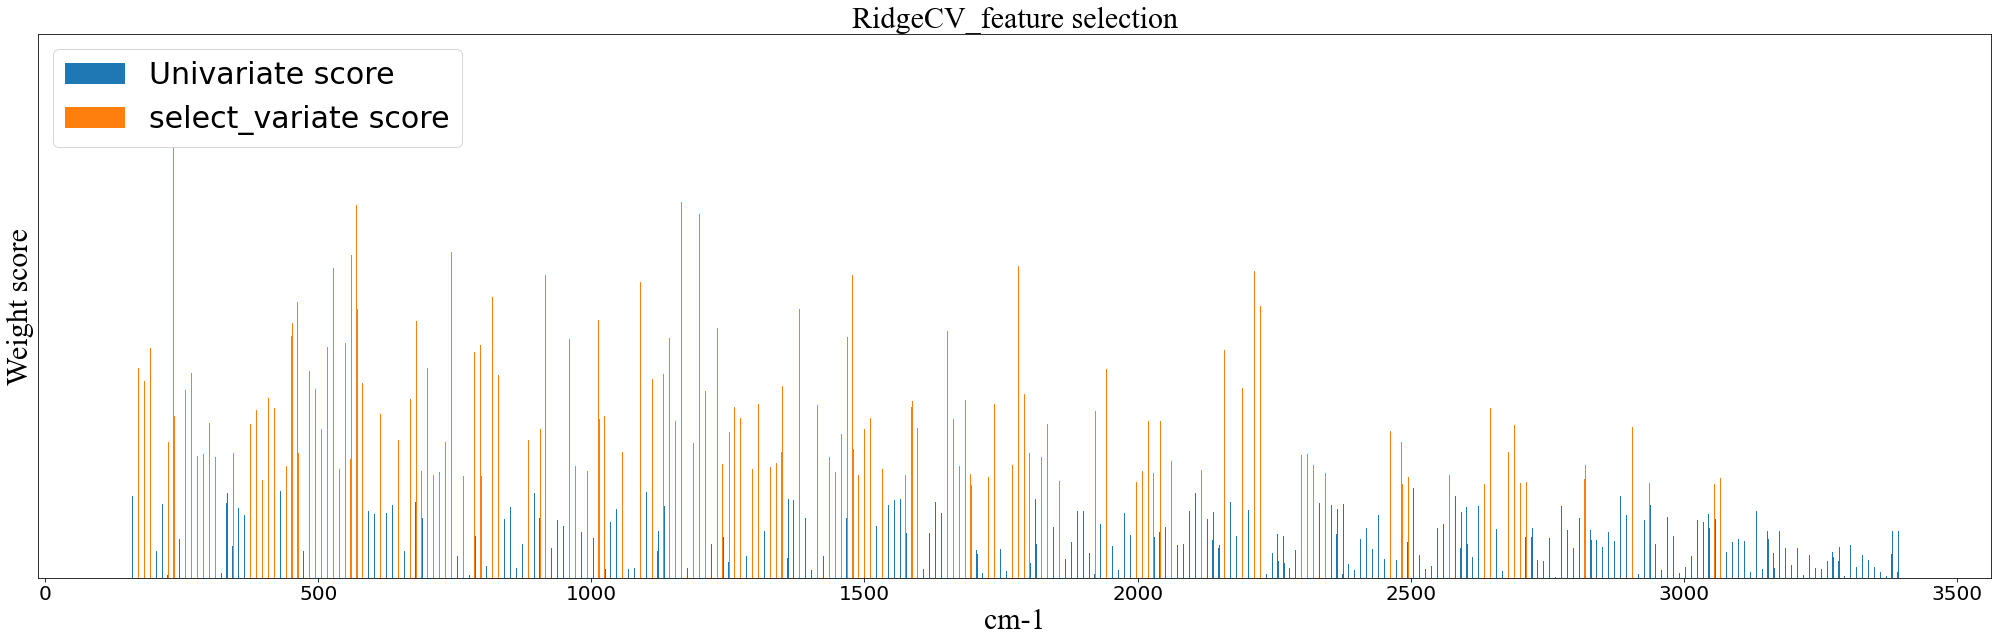

Index([3067, 3062, 3056, 3031, 3018, 3017, 3016, 2953, 2952, 2944,
       ...
        161,  159,  158,  156,  155,  154,  153,  152,  151,  150],
      dtype='object', length=1282)


In [52]:
x_rid=select_feature_coef_figure_contact(rid_cv,"RidgeCV",x,y)

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8232.029940129789, tolerance: 5.268396519219229
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8420.258700801847, tolerance: 5.025635305379164
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5736.135201120336, tolerance: 2.9726366187178908
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

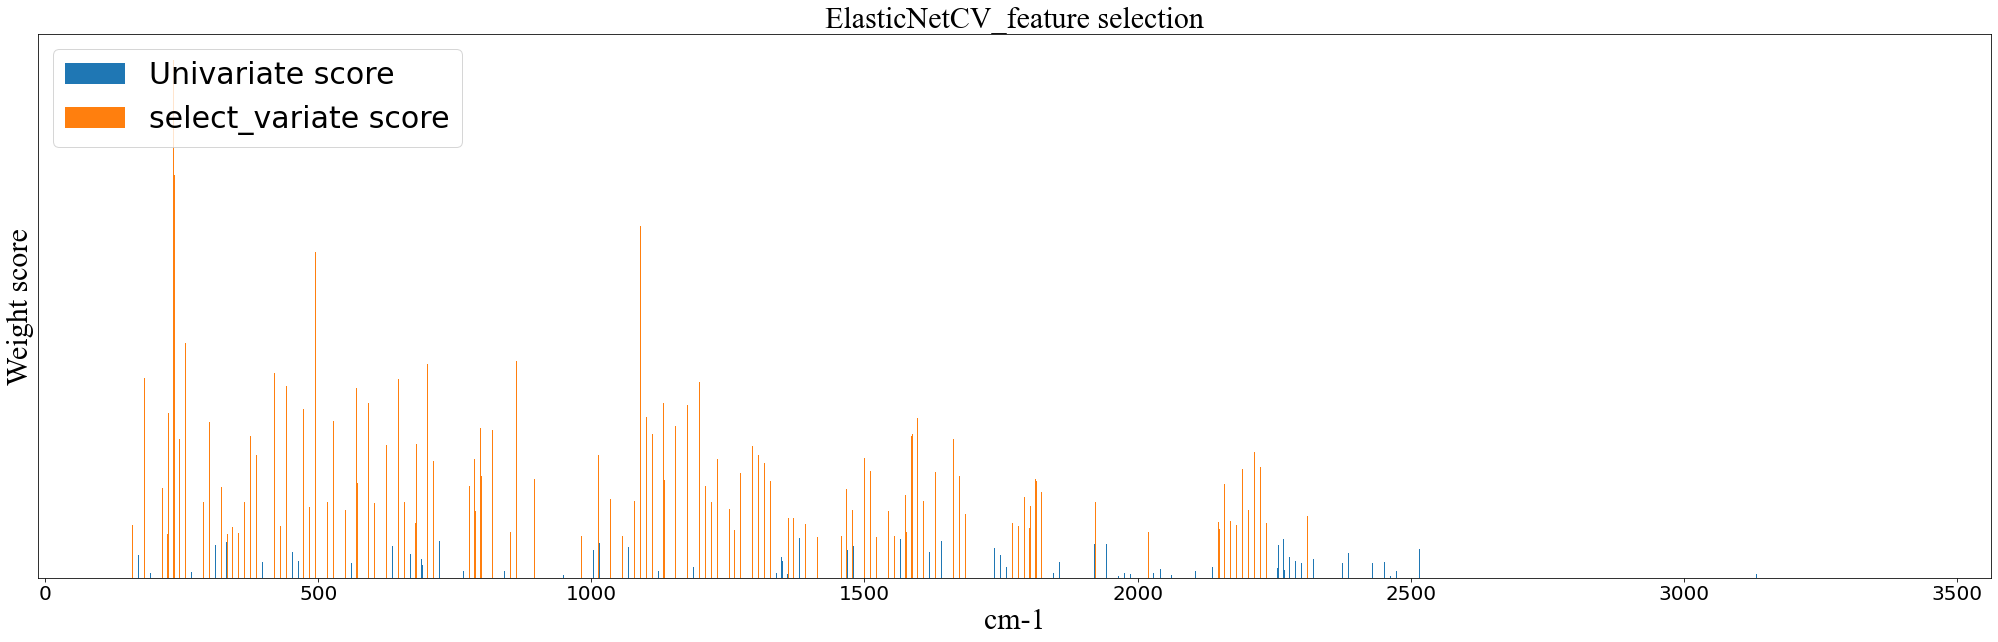

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8232.029940129789, tolerance: 5.268396519219229
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8420.258700801847, tolerance: 5.025635305379164
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5736.135201120336, tolerance: 2.9726366187178908
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

Index([2425, 2424, 2318, 2317, 2316, 2315, 2314, 2313, 2312, 2311,
       ...
        175,  174,  160,  159,  158,  157,  156,  155,  154,  153],
      dtype='object', length=1093)


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9496.00065908151, tolerance: 5.761080456470008
  model = cd_fast.enet_coordinate_descent(


In [53]:
x_regr=select_feature_coef_figure_contact(elas_cv,"ElasticNetCV",x,y)

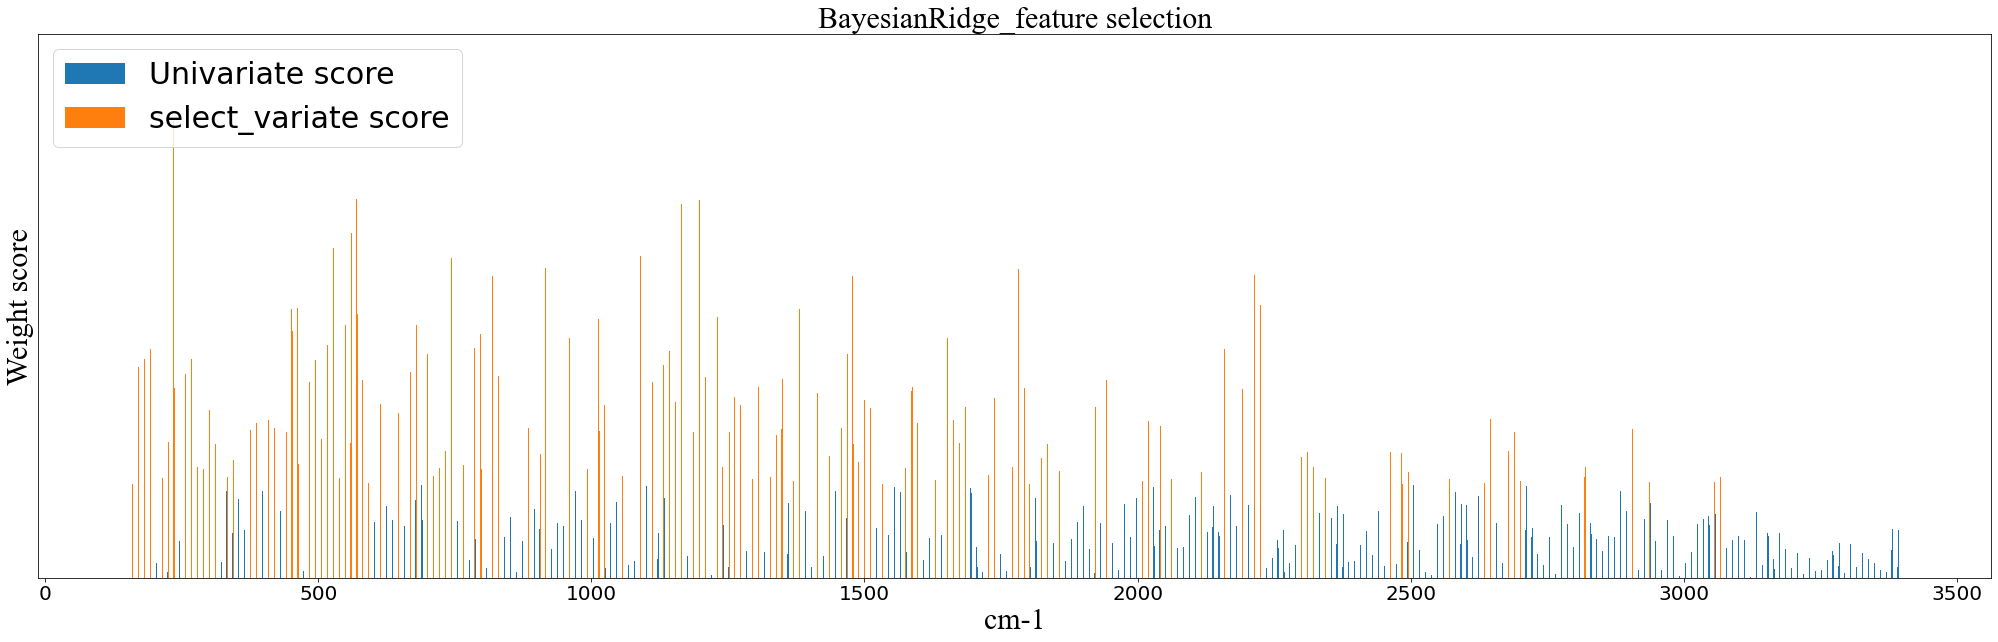

Index([3067, 3062, 3056, 3031, 3017, 3016, 2952, 2944, 2943, 2937,
       ...
        160,  159,  158,  156,  155,  154,  153,  152,  151,  150],
      dtype='object', length=1258)


In [54]:
x_bay=select_feature_coef_figure_contact(bay,"BayesianRidge",x,y)

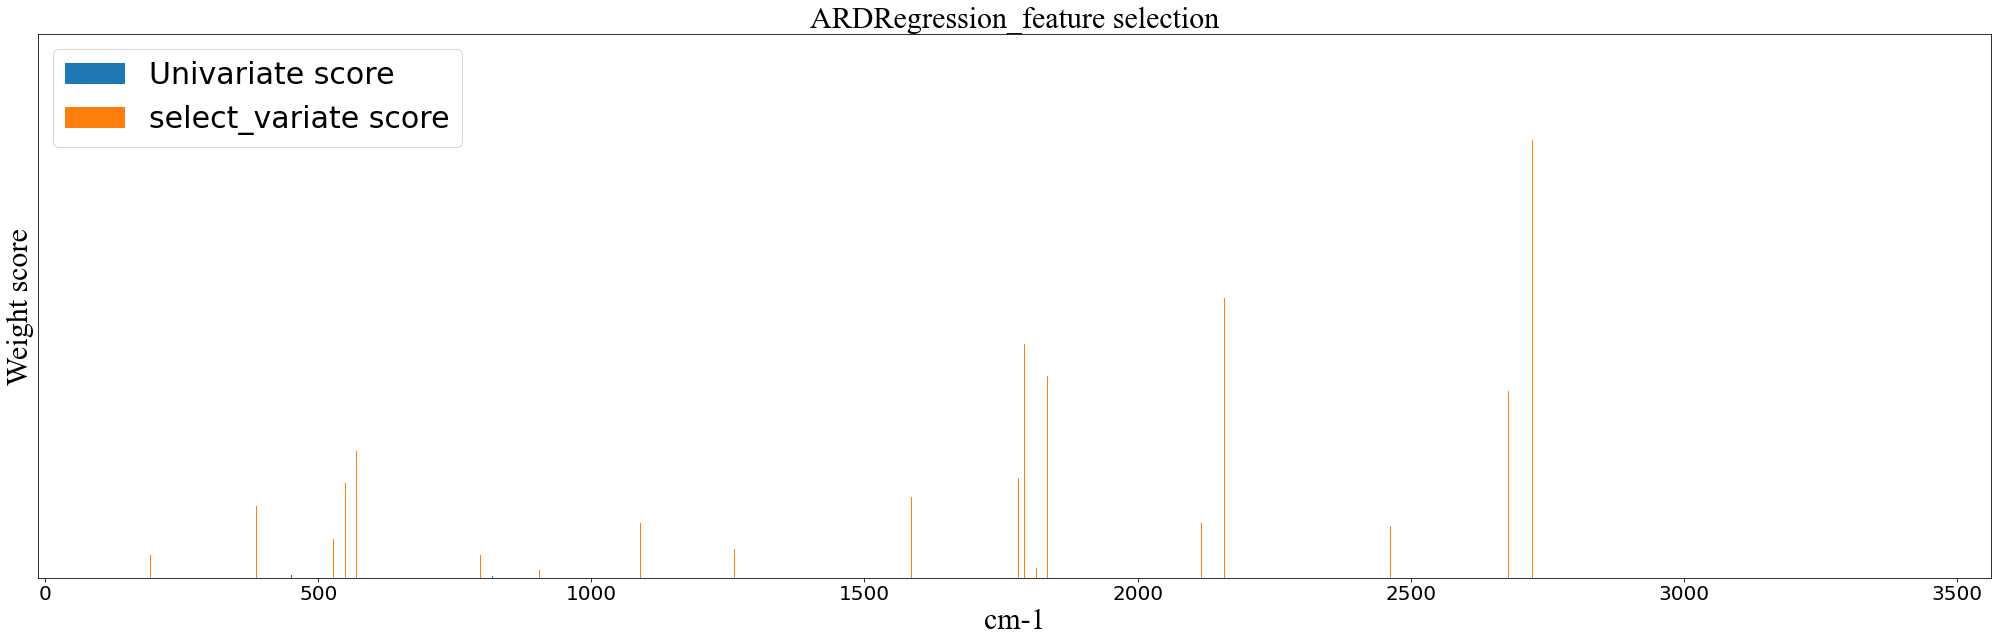

Index([3017, 2984, 2904, 2899, 2896, 2879, 2863, 2819, 2782, 2778,
       ...
        435,  434,  387,  370,  349,  348,  264,  220,  193,  176],
      dtype='object', length=143)


In [55]:
x_ard=select_feature_coef_figure_contact(ard,"ARDRegression",x,y)

C:\Users\Xufeng\AppData\Local\Temp/ipykernel_34772/1334184750.py:55: RuntimeWarning: divide by zero encountered in log10
  rid_score = -np.log10(selector.estimator_.feature_importances_)


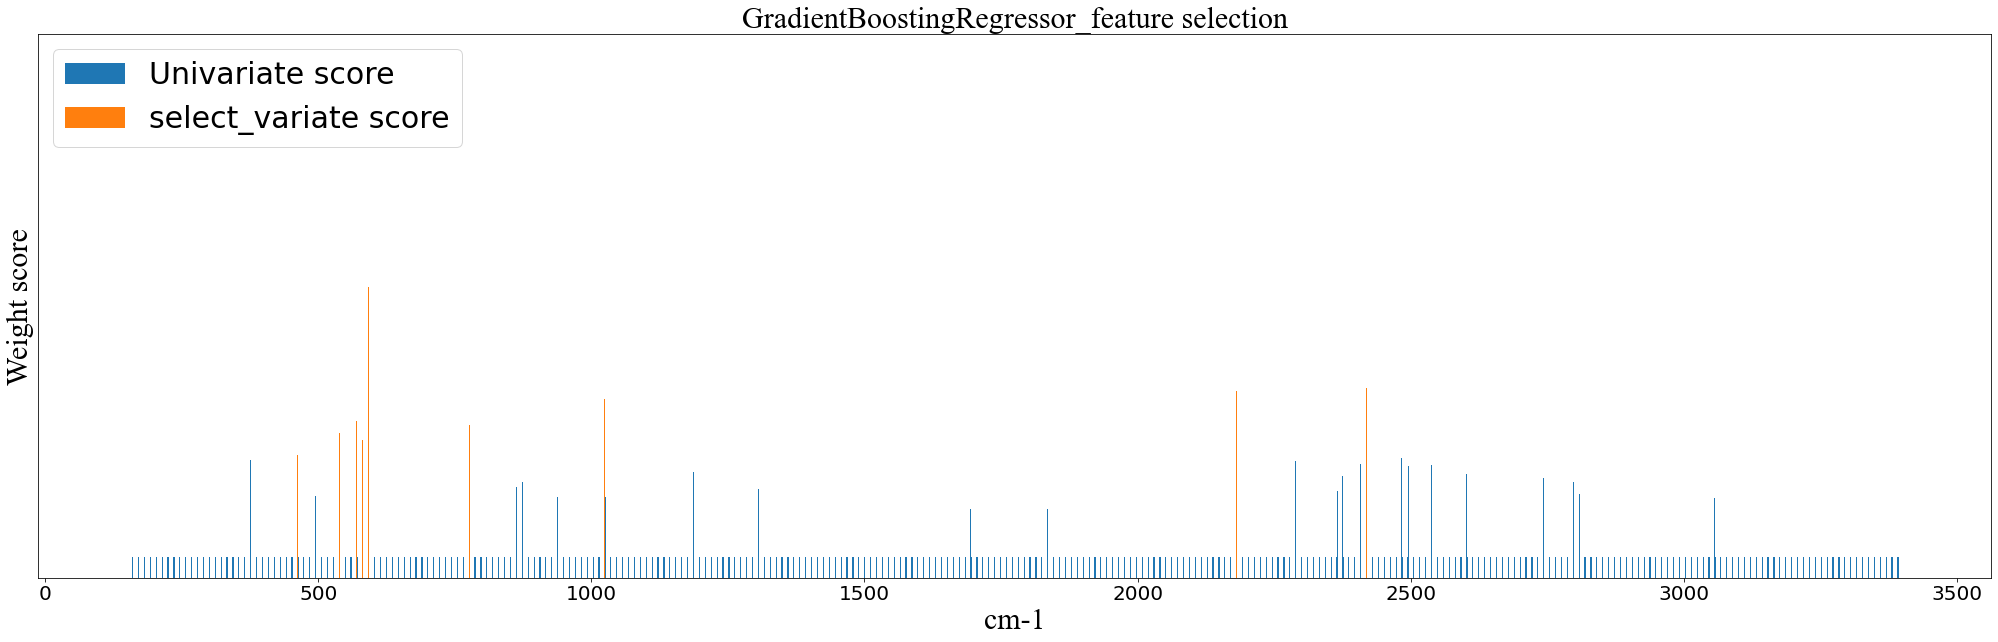

Index([2840, 2688, 2628, 2623, 2611, 2491, 2490, 2489, 2487, 2475,
       ...
        542,  539,  520,  496,  488,  468,  463,  461,  413,  308],
      dtype='object', length=108)


In [31]:
x_reg=select_feature_important_figure_contact(reg,"GradientBoostingRegressor",x,y)

C:\Users\Xufeng\AppData\Local\Temp/ipykernel_34772/1334184750.py:55: RuntimeWarning: divide by zero encountered in log10
  rid_score = -np.log10(selector.estimator_.feature_importances_)


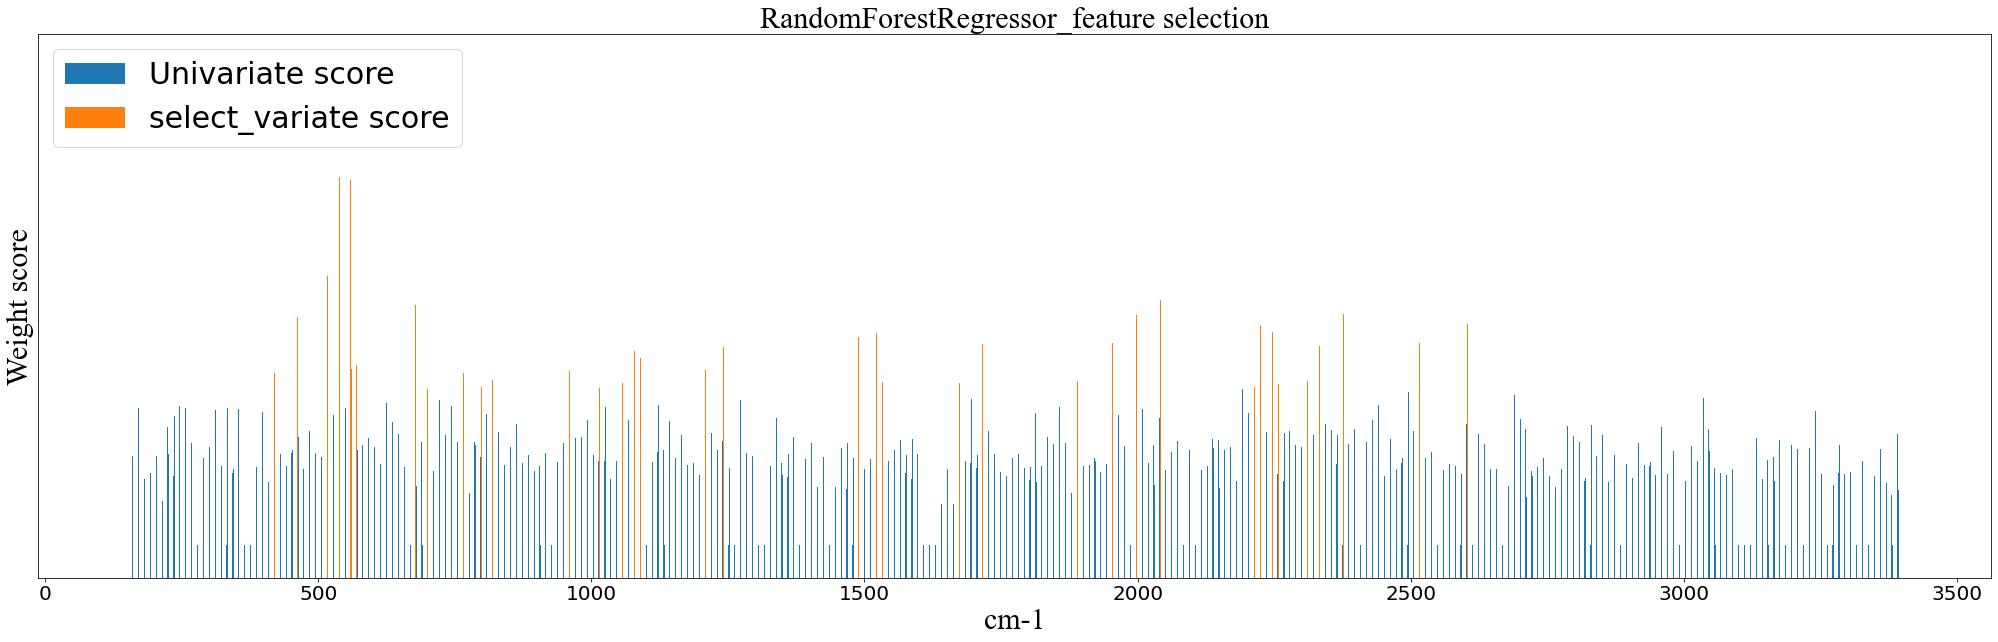

Index([3305, 3030, 2863, 2702, 2685, 2658, 2649, 2608, 2604, 2586,
       ...
        337,  317,  262,  260,  258,  225,  180,  172,  171,  166],
      dtype='object', length=278)


In [32]:
x_reclf=select_feature_important_figure_contact(reclf,"RandomForestRegressor",x,y)

## 特征选择后模型拟合

In [33]:
def adjust_parameter(x,y):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaler.fit(x)
    x_scaler=scaler.transform(x)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train_scaler=scaler.transform(x_train)
    x_test_scaler=scaler.transform(x_test)
    x_test_scaler
    print("=======================================超参数调整=============================================================")
    num=[]
    from sklearn.model_selection import GridSearchCV 
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import datasets
    import pandas as pd
    from pandas import DataFrame
    from sklearn.metrics import mean_squared_error
    #grid_cv=GridSearchCV() 
    ################################################
    from sklearn.linear_model import Ridge
    rdg=Ridge()
    alpha=np.arange(1000,1500,1)
    param_grid=dict(alpha=alpha)
    grid_cv=GridSearchCV(rdg,param_grid,cv=10)
    grid_cv.fit(x_train_scaler,y_train)
    print(grid_cv.best_params_)
    print(grid_cv.best_estimator_)
    print(grid_cv.best_score_)
    num.append("Ridge")
    num.append(grid_cv.best_params_)
    rdg=grid_cv.best_estimator_
    ########################################
    from sklearn import linear_model
    las = linear_model.Lasso()
    alpha=[1e-3, 1e-2, 1e-1, 0.5,1,1.5,2]
    param_grid=dict(alpha=alpha)
    grid_cv=GridSearchCV(las,param_grid,cv=10)
    grid_cv.fit(x_train_scaler,y_train)
    print(grid_cv.best_params_)
    print(grid_cv.best_estimator_)
    print(grid_cv.best_score_)
    num.append("Lasso")
    num.append(grid_cv.best_params_)
    las=grid_cv.best_estimator_
    #########################################
    from sklearn.linear_model import ElasticNet
    regr = ElasticNet()
    l1_ratio=[1e-3,1e-2,1e-1, .5, .7,.75,.8, .85,.9, .95, .99, 1,1.5,1.8,2,2.5]
    alpha=[1e-3, 1e-2, 1e-1,0.5, 1,1.5,2]
    param_grid=dict(l1_ratio=l1_ratio,alpha=alpha)
    grid_cv=GridSearchCV(regr,param_grid,cv=10)
    grid_cv.fit(x_train_scaler,y_train)
    print(grid_cv.best_estimator_)
    print(grid_cv.best_params_)
    print(grid_cv.best_score_)
    num.append("ElasticNet")
    num.append(grid_cv.best_params_)
    regr=grid_cv.best_estimator_
    #######################################################################################
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsRegressor()#k近邻
    weights=['uniform','distance']
    n_neighbors=np.arange(20)
    p=np.arange(10)
    param_grid=dict(weights=weights,n_neighbors=n_neighbors,p=p)
    grid_cv1=GridSearchCV(neigh,param_grid,cv=5)
    grid_cv1.fit(x_train_scaler,y_train)
    print(grid_cv1.best_estimator_)
    print(grid_cv1.best_score_)
    print(grid_cv1.best_params_)
    num.append("KNeighborsRegressor")
    num.append(grid_cv1.best_params_)
    neigh=grid_cv1.best_estimator_
    ###############################################################################################
    from sklearn import svm
    clf = svm.SVR()#支持向量机
    kernel=['linear','rbf','poly']
    C=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19,20,21,22,23,24,25]
    gamma=[0.00001, 0.0001, 0.001, 0.1, 1, 10]
    degree=[1,2,3,4,5]
    parameters=dict(kernel=kernel,C=C,gamma=gamma,degree=degree)
    grid_cv2=GridSearchCV(clf,parameters,cv=5)
    grid_cv2.fit(x_train_scaler,y_train)
    pd.DataFrame(grid_cv2.cv_results_)
    print(grid_cv2.best_estimator_)
    print(grid_cv2.best_score_)
    print(grid_cv2.best_params_)
    num.append("SVR")
    num.append(grid_cv2.best_params_)
    clf=grid_cv2.best_estimator_
    #########################################################################################################
    from sklearn.neural_network import MLPRegressor
    mlp=MLPRegressor()
    hidden_layer_sizes=np.arange(50,150,10)
    activation=['logistic','tanh','relu']
    solver=['lbfgs','sgd','adam']
    parameters=dict(hidden_layer_sizes=hidden_layer_sizes,activation=activation,solver=solver)
    grid_cv3=GridSearchCV(mlp,parameters,cv=5)
    grid_cv3.fit(x_train_scaler,y_train)
    print(grid_cv3.best_params_)
    print(grid_cv3.best_estimator_)
    print(grid_cv3.best_score_)
    num.append("MLPRegressor")
    num.append(grid_cv3.best_params_)
    mlp=grid_cv3.best_estimator_
    ################################################################################
    from sklearn.ensemble import GradientBoostingRegressor
    reg = GradientBoostingRegressor()#梯进树
    n_estimators=np.arange(50,150,10)
    parameters=dict(n_estimators=n_estimators)
    grid_cv4=GridSearchCV(reg,parameters,cv=5)
    grid_cv4.fit(x_train_scaler,y_train)
    print(grid_cv4.best_params_)
    print(grid_cv4.best_estimator_)
    print(grid_cv4.best_score_)
    num.append("GradientBoostingRegressor")
    num.append(grid_cv4.best_params_)
    reg=grid_cv4.best_estimator_
    ###########################################################################
    from sklearn.ensemble import RandomForestRegressor
    reclf=RandomForestRegressor()#随机深林
    grid_cv5=GridSearchCV(reclf,parameters,cv=5)
    grid_cv5.fit(x_train_scaler,y_train)
    pd.DataFrame(grid_cv5.cv_results_)
    print(grid_cv5.best_params_)
    print(grid_cv5.best_estimator_)
    print(grid_cv5.best_score_)
    num.append("RandomForestRegressor")
    num.append(grid_cv5.best_params_)
    reclf=grid_cv5.best_estimator_

    ################################################################
    from sklearn import linear_model
    bay = linear_model.BayesianRidge()
    from sklearn import linear_model
    ard = linear_model.ARDRegression()
    from sklearn.cross_decomposition import PLSRegression
    pls= PLSRegression(n_components=4)
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()#决策树

    estimator=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),
               ('DecisionTreeRegressor',regressor),('Lasso',las),('MLPRegressor',mlp),('PLSRegression',pls),('ElasticNet',regr),
               ('BayesianRidge',bay),('ARDRegression',ard)]
    estimator2=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),
                ('Lasso',las),('MLPRegressor',mlp),('ElasticNet',regr),('BayesianRidge',bay)]
    from sklearn.ensemble import VotingRegressor
    er1 = VotingRegressor(estimator2)

    ################################################################
    from sklearn import linear_model
    bay = linear_model.BayesianRidge()
    from sklearn import linear_model
    ard = linear_model.ARDRegression()
    from sklearn.cross_decomposition import PLSRegression
    pls= PLSRegression(n_components=4)
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()#决策树

    estimator=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),
               ('DecisionTreeRegressor',regressor),('Lasso',las),('MLPRegressor',mlp),('PLSRegression',pls),('ElasticNet',regr),
               ('BayesianRidge',bay),('ARDRegression',ard)]
    estimator2=[('KNeighborsRegressor', neigh),('SVR',clf),('Ridge',rdg),('GradientBoostingRegressor',reg),('RandomForestRegressor',reclf),
                ('Lasso',las),('MLPRegressor',mlp),('ElasticNet',regr),('BayesianRidge',bay)]
    from sklearn.ensemble import VotingRegressor
    er1 = VotingRegressor(estimator2)
    print("===============================模型训练=====================================================================")
    aa=mchine_learn_amount_scaler(x,y,estimator+[('VotingRegressor',er1)],number=100)
    return num,estimator,aa

In [34]:
main_estimaator_rid,new_estimators_rid,Datas_rid=adjust_parameter(x_rid,y)
main_estimaator_regr,new_estimators_regr,Datas_regr=adjust_parameter(x_regr,y)
main_estimaator_bay,new_estimators_bay,Datas_bay=adjust_parameter(x_bay,y)
main_estimaator_ard,new_estimators_ard,Datas_ard=adjust_parameter(x_ard,y)
main_estimaator_reg,new_estimators_reg,Datas_reg=adjust_parameter(x_reg,y)
main_estimaator_reclf,new_estimators_reclf,Datas_reclf=adjust_parameter(x_reclf,y)

=======================================超参数调整=============================================================
{'alpha': 1000}
Ridge(alpha=1000)
0.5440109314935279


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.67742825481962, tolerance: 3.973978440623448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.05275716423188, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.2600492309586, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.3867046472751, tolerance: 4.2470066299803015
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.7848610039978, tolerance: 3.973978440623448
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.1}
Lasso(alpha=0.1)
0.6892238179686924


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.79230306745352, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.24710798218494, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.05332146191438, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.81108260654301, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.78818027442922, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.19708567351957, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.91363048018933, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.93708505977972, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132.05907770698676, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.88562390260753, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.3684159112811, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132.48995044584134, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436.9200344392468, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.79187468286995, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.75928033902284, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513.8949985536033, tolerance: 3.973978440623448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.43545301980873, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.239673107257, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509.94072694728675, tolerance: 4.0242990857110685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.67162621539325, tolerance: 3.973978440623448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.1666890973118, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.11668323798415, tolerance: 3.9423766351618545
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.7978031685675, tolerance: 4.0242990857110685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.13395297458476, tolerance: 3.973978440623448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.8371216245838, tolerance: 3.4791935877273734
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.659471795427, tolerance: 3.9423766351618545
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445.9390648835194, tolerance: 4.0242990857110685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2101.1458474125525, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2313.1345321837334, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2321.4468495292967, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2272.103789822573, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2372.367257679716, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2298.156326983548, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1420.7342699122637, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1512.3736660270029, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1643.9947148820972, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.7963467112766, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907.8057736108972, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953.4106970691694, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=2

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sk

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4308.77795689643, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4929.211402691572, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4791.60718058548, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.26179705644245, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249.3393123123151, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226.11771144025442, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.4527357189545, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.83955802852506, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.44202193439014, tolerance: 3.901659296768649
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5323.942692479944, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6210.210275098892, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5928.882504731428, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.057270978726592, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.327520258990262, tolerance: 3.900832383352513
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5288703731330315, tolerance: 3.9423766351618545
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5877.876522802113, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6937.626456078761, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6556.017786625056, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6300.255213069607, tolerance: 3.7222210467758257
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7369.4771453834865, tolerance: 4.041217380479586
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6955.74447694501, tolerance: 3.521809483352177
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.1, l1_ratio=0.001)
{'alpha': 0.1, 'l1_ratio': 0.001}
0.8519240481633192


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.46095302 0.46095302
 0.65900104 0.65900104 0.75399508 0.75399508 0.59813268 0.59813268
 0.59724596 0.59724596 0.44778573 0.44778573 0.44283455 0.44283455
 0.44039801 0.44039801 0.44033982 0.44033982        nan        nan
 0.7162508  0.72027789 0.71094623 0.7184795  0.7272666  0.73254932
 0.69979079 0.70408309 0.66362664 0.67383532 0.66520245 0.67272891
 0.66371203 0.6704082  0.62467288 0.63132176 0.60499301 0.61301396
        nan        nan 0.66991809 0.68125033 0.64684271 0.66295617
 0.64946528 0.6617274  0.64036439 0.652883   0.62861956 0.63945084
 0.64728912 0.6554567  0.64838015 0.65586622 0.64647447 0.6

KNeighborsRegressor(n_neighbors=1, p=3)
0.7539950778474208
{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
SVR(C=19, degree=1, gamma=0.1, kernel='poly')
0.8798631055756893
{'C': 19, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

{'activation': 'relu', 'hidden_layer_sizes': 110, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=110, solver='lbfgs')
0.8905150782223397
{'n_estimators': 60}
GradientBoostingRegressor(n_estimators=60)
0.53178571589068
{'n_estimators': 90}
RandomForestRegressor(n_estimators=90)
0.5928240876578432
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.43552657  0.42095447  0.82006589 -0.02836975  0.47824515  0.64171208
   0.62270649  0.86914936  0.7604352   0.36339361  0.44209941  0.37924923
   0.12462527  0.86284044  0.71766689  0.92559304  0.40730605  0.67743865
   0.83114961  0.78226046  0.92874817  0.80527547  0.84608178 -0.51691149
   0.195996    0.65623885  0.78934312  0.95993341  0.8400682   0.76463948
   0.49900047  0.39216708  0.61147506  0.27995981  0.55036434  0.42099511
   0.65224856 -0.16507153  0.32311834  0.16007284  0.74742711  0.3393465
   0.571483    0.8905841   0.40960641  0.46616204  0.9821

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 702.7200757664316, tolerance: 4.426904297515527
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.0000498339584, tolerance: 4.413167185305054
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545.5929662823783, tolerance: 3.819851531924946
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.8052659709206, tolerance: 4.432565557194025
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876.6573149380783, tolerance: 4.3264191581917215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.64775254627966, tolerance: 3.1463341379203444
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.87820342948726, tolerance: 3.816501044105421
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.5771173752719, tolerance: 3.6887956344079615
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.8624778315052, tolerance: 3.55314246475117
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.48476718977827, tolerance: 3.5874996776228185
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.74190738280663, tolerance: 3.9761475263201733
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.99863932572862, tolerance: 3.6453643504233217
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

Lasso
[[0.53102799 0.6227497  0.67055852 0.71198818 0.60253914 0.43893867
  0.64579384 0.68139573 0.72904398 0.65288582 0.69392275 0.67389903
  0.65728082 0.77365678 0.70356744 0.68926801 0.67920579 0.673648
  0.60865071 0.70646294 0.7003447  0.73224106 0.73856883 0.63774674
  0.60842021 0.68846902 0.73240124 0.58344071 0.78244372 0.74634295
  0.6537068  0.45395982 0.73106279 0.63316586 0.71625595 0.48770843
  0.71592874 0.7465841  0.39457963 0.30452982 0.73372181 0.69484131
  0.25457382 0.72767199 0.76145216 0.67123956 0.60168952 0.67194906
  0.49502688 0.70501137 0.63320522 0.65402245 0.61982098 0.73616193
  0.54966056 0.76020362 0.65262586 0.66524698 0.76317918 0.74605183
  0.5606624  0.64474891 0.72555154 0.69218699 0.57101233 0.73896941
  0.60443123 0.76806263 0.70223528 0.66866321 0.65255778 0.7352747
  0.69151585 0.76751999 0.59647185 0.6675602  0.7091725  0.76807116
  0.65664007 0.62116959 0.75296651 0.6109375  0.63813176 0.20172337
  0.71964394 0.73424881 0.73357266 0.75201002

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

MLPRegressor
[[0.57640346 0.7560937  0.85138916 0.94669153 0.87469513 0.93671866
  0.87442757 0.95379352 0.78047183 0.70615957 0.85808605 0.61196181
  0.90174589 0.66495377 0.37839522 0.96464898 0.91984175 0.86686322
  0.77302147 0.82733538 0.73247789 0.85369763 0.92951058 0.80799263
  0.91066493 0.85681781 0.90636893 0.90630446 0.80306955 0.8010563
  0.89976424 0.64799736 0.90550895 0.8657144  0.92424608 0.91744675
  0.79800955 0.77121961 0.87498122 0.93241593 0.83686271 0.91606066
  0.7869338  0.92864254 0.75617041 0.73963997 0.9069602  0.89684912
  0.65130286 0.79659997 0.82364691 0.75905741 0.74448503 0.93317764
  0.80295527 0.90015997 0.82228603 0.74466166 0.91925358 0.77280983
  0.83953204 0.70836444 0.90422802 0.90139569 0.91370984 0.73068208
  0.87996134 0.48666936 0.84147964 0.67782604 0.91078013 0.86083684
  0.72148213 0.85536587 0.91390877 0.85864915 0.92579417 0.2517085
  0.79225056 0.84917725 0.79908472 0.90120524 0.89055535 0.88912289
  0.731318   0.90375574 0.90400078 0.

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209.356004722181, tolerance: 3.693802904414058
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2649.8753841666366, tolerance: 4.108110870701229
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2715.3125594246494, tolerance: 4.180627216563627
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2398.95133377582, tolerance: 3.954012393190562
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2611.62505158413, tolerance: 4.058666386294036
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2568.8728304670394, tolerance: 3.673594330886327
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2523.2853501830978, tolerance: 3.6823821943170176
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2221.0487630001103, tolerance: 3.9309279819151497
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1895.1991046852827, tolerance: 3.5652247172942197
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2368.508723271434, tolerance: 4.467810350717522
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2715.7616563478564, tolerance: 4.2870601596114986
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2433.660046000778, tolerance: 4.011010944562753
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

ElasticNet
[[0.87005484 0.86535345 0.91862491 0.91822434 0.87503496 0.86319468
  0.8515527  0.8697152  0.80312832 0.80827222 0.89022508 0.89655527
  0.83972299 0.9049948  0.90831306 0.85828068 0.65284208 0.87776944
  0.86187937 0.81604553 0.89195934 0.86706951 0.84921223 0.75094578
  0.87991958 0.916358   0.86439817 0.85327815 0.72183625 0.91586437
  0.88929142 0.90944801 0.89847623 0.68544636 0.88079915 0.88220603
  0.89665996 0.87430054 0.89592875 0.82669817 0.72652989 0.86469111
  0.85419372 0.8322005  0.68380375 0.63899495 0.85110324 0.9293116
  0.81432915 0.63581418 0.8896167  0.90375773 0.8363716  0.87279074
  0.8961913  0.89897817 0.56569375 0.85126497 0.83138868 0.74625758
  0.88774425 0.8105263  0.82359676 0.83612477 0.83706234 0.89712404
  0.63786395 0.85734847 0.75829388 0.81814388 0.88627228 0.90581048
  0.87037993 0.87894663 0.91192812 0.61416981 0.88292612 0.869428
  0.79097471 0.7955004  0.84483816 0.84925989 0.75673793 0.86644853
  0.86745667 0.90231372 0.71200534 0.798

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175.2724242490547, tolerance: 4.11558128179764
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2771.653545660994, tolerance: 4.11558128179764
  model = cd_fast.enet_coordinate_descent(
D:\Coding\ana

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2507.9794844962266, tolerance: 4.208428923762721
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.4423715182779, tolerance: 4.273327718311859
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.5636056351909, tolerance: 3.833158259472564
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2167.151735955698, tolerance: 3.833158259472564
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2258.2219273937776, tolerance: 4.121964349227873
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.4954436560581, tolerance: 4.481004418228465
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 992.3549544116629, tolerance: 4.3911595774763335
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2625.916535741995, tolerance: 4.3911595774763335
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2566.5258654415866, tolerance: 4.311989449596738
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848.0932114725465, tolerance: 4.411072315908052
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206.90227403118843, tolerance: 3.734040325700234
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1989.490189086395, tolerance: 3.734040325700234
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2706.6586888140573, tolerance: 4.224411556642427
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204.0614764569332, tolerance: 4.2325752504867244
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743.6801481299801, tolerance: 4.447685232198587
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2669.7075587156396, tolerance: 4.447685232198587
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473.02921531788, tolerance: 4.3785810359960555
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.16155171730634, tolerance: 3.7435871726214973
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 888.7962854944449, tolerance: 4.2582359489576636
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770.7971363337465, tolerance: 4.2582359489576636
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2330.889744136408, tolerance: 4.452293701497411
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 934.241981867214, tolerance: 4.379009361977067
  model = cd_fast.enet_coordinate_descent(
D:\Coding\ana

VotingRegressor
[[0.92499764 0.77442436 0.83955967 0.76138614 0.88582967 0.8744102
  0.77435615 0.84272892 0.76205797 0.5795748  0.70892713 0.69811454
  0.72442889 0.62252692 0.6237787  0.87453279 0.78817233 0.75465638
  0.74890129 0.94120592 0.7402821  0.69968799 0.71841017 0.94310456
  0.83532363 0.81065222 0.90445151 0.68529831 0.81933577 0.83768307
  0.67637901 0.67002921 0.73314887 0.88078119 0.77052106 0.63440311
  0.6995697  0.78959687 0.86811686 0.87402693 0.8252303  0.90631733
  0.62663989 0.69363285 0.85984769 0.87630428 0.81380629 0.82541978
  0.8504854  0.83415992 0.66495834 0.73388351 0.90702338 0.82270525
  0.82497875 0.67750115 0.69337667 0.80446776 0.83198149 0.8773177
  0.96013764 0.76202516 0.81547826 0.72683274 0.77838851 0.90053646
  0.70212141 0.65660346 0.8110961  0.77228534 0.78396122 0.85855604
  0.72678586 0.77998916 0.85955898 0.5495728  0.87449225 0.60814905
  0.88572815 0.72318754 0.72077204 0.81928338 0.78707602 0.62618188
  0.67952317 0.8300458  0.41281185

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124.7343537017531, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.63491472249105, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.02760032783699, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233.83980102225178, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.0027273089213, tolerance: 3.6908702611060256
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.07870544538349, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.1}
Lasso(alpha=0.1)
0.7580797152863673


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.33457774243219, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.3466367303369, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.38327066979338, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.06804115486193, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.7005260505098, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.31059318732991, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.36140393438141, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.20313136368225, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.65516535676309, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.54547605341615, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.17347310731292, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.98820627409039, tolerance: 3.3597524896418576
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.82371835519837, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294.7419114350082, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439.00821973771184, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.2771709862551, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.0176189265525, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.02346800909777, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.76788732970147, tolerance: 3.4159649549596494
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436.95068354433414, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.79964915871494, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.41405934472533, tolerance: 3.4159649549596494
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.35734603984105, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.1481937672672, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.86982487567263, tolerance: 3.4159649549596494
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.87627307956603, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1827.0013731994459, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216.7060864435298, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1837.8490308805704, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1824.1962467123985, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319.3597641173048, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.6618627609162, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.9901942743164, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 568.1015910878826, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.0800358583067, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.2793237292751, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367.84543177976207, tolerance: 3.3597524896418576
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.28357871128355, tolerance: 3.202633517951103
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3499.3571352792205, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2262.994921961272, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3543.8175451289926, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2511.033857842809, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.01725252736378, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.80270568749984, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.751683201689957, tolerance: 3.358093452624886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.126399281876729, tolerance: 3.3698643283212077
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.371231808897392, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2737.4493501261636, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4306.521421529962, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4412.05130049943, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.216620127997885, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.329911704104234, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.807888185170668, tolerance: 3.3597524896418576
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2980.7456158382156, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4708.91624547374, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4833.855908859036, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3232.3177363432524, tolerance: 3.0572712045243224
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5014.842735557719, tolerance: 3.2334894496744866
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5147.851100543512, tolerance: 3.4735785287106316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.1, l1_ratio=0.1)
{'alpha': 0.1, 'l1_ratio': 0.1}
0.8342381777772767


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.79371419 0.79371419
 0.75936265 0.75936265 0.75817042 0.75817042 0.76147754 0.76147754
 0.75993161 0.75993161 0.75721151 0.75721151 0.75647269 0.75647269
 0.7547075  0.7547075  0.75018727 0.75018727        nan        nan
 0.71166864 0.74296961 0.70216855 0.73282406 0.72958648 0.7531902
 0.78259726 0.80328432 0.714795   0.74429869 0.72669743 0.75416524
 0.72513057 0.75091141 0.71911387 0.74496655 0.70009802 0.72662922
        nan        nan 0.67625379 0.73622677 0.63930415 0.69798205
 0.65913846 0.714761   0.66581235 0.71495454 0.69559163 0.74342444
 0.69405874 0.74043111 0.6803791  0.72695917 0.68079112 0.72

KNeighborsRegressor(n_neighbors=2, p=4, weights='distance')
0.8032843212729178
{'n_neighbors': 2, 'p': 4, 'weights': 'distance'}
SVR(C=13, degree=1, gamma=0.1, kernel='poly')
0.835836638850394
{'C': 13, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

{'activation': 'relu', 'hidden_layer_sizes': 140, 'solver': 'sgd'}
MLPRegressor(hidden_layer_sizes=140, solver='sgd')
0.8150509614511643
{'n_estimators': 140}
GradientBoostingRegressor(n_estimators=140)
0.5410367956032986
{'n_estimators': 50}
RandomForestRegressor(n_estimators=50)
0.5978821767777793
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.60890144  0.65383259  0.50753938  0.53205564  0.94393555  0.77131715
   0.56031482  0.92647878  0.53150947  0.80535056  0.8835054   0.93426161
   0.62585587  0.20821841  0.10605638  0.38647897  0.44391451 -0.13765048
   0.55616949  0.36266205  0.46489088  0.93340893  0.37338254  0.83037184
   0.20007211  0.70072784  0.36892875  0.84202555 -0.97799426  0.62123847
   0.36563818  0.50624852  0.50672506  0.79908794  0.465629    0.64415551
   0.33403889  0.90228467  0.72500711  0.76664877  0.86478663  0.53617532
   0.87227416  0.32318324  0.44440753  0.79728745  0.808

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.2724954111304, tolerance: 4.046121957055165
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.2104264173431, tolerance: 4.2707497604273845
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224.41550625592072, tolerance: 3.7146966959284673
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.54461933239145, tolerance: 3.7068457237577612
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575.3118040880181, tolerance: 4.074548488335432
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423.29448718673075, tolerance: 4.126512167380576
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.80810302975715, tolerance: 3.525736200715687
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.1373798821123, tolerance: 3.8720565759766274
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.8467610509601, tolerance: 4.5079160423403675
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509.77174885823115, tolerance: 3.730335108094683
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.4861951253297, tolerance: 4.126215090859874
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537.629003974037, tolerance: 4.426094604599599
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

Lasso
[[0.57101422 0.79823761 0.64425233 0.52910963 0.71999101 0.80566071
  0.80376304 0.62870142 0.66359676 0.82777878 0.6922071  0.69283522
  0.72780915 0.70799453 0.53306298 0.75372956 0.72340731 0.83591808
  0.68715694 0.68637765 0.77538829 0.60738175 0.70591705 0.62793675
  0.69536622 0.72244278 0.6900165  0.70833395 0.59157471 0.75621196
  0.76303583 0.72798421 0.74047593 0.72213333 0.62682759 0.68723195
  0.71608431 0.69976769 0.67943031 0.51389757 0.70422733 0.41973418
  0.67836539 0.70164333 0.63744044 0.62604211 0.72644947 0.7891521
  0.48109817 0.67831081 0.6492347  0.66763795 0.69140025 0.69238927
  0.77346168 0.61368066 0.68417236 0.74978304 0.70395539 0.59131504
  0.64346992 0.74087661 0.76965575 0.66332456 0.6462046  0.4959224
  0.47962406 0.6791871  0.82114394 0.59029023 0.67608092 0.71329302
  0.63867583 0.68176131 0.80562162 0.45997211 0.64579318 0.4723963
  0.70564109 0.64746682 0.65857449 0.71654724 0.56564881 0.63989376
  0.70960975 0.37711185 0.38836796 0.75675326

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2148.9049304396435, tolerance: 3.5933740743640477
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2369.8063034340475, tolerance: 3.1078627103686234
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3415.8059323815232, tolerance: 4.169484734562099
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3182.7905549683805, tolerance: 4.188001491927895
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2299.5577504161847, tolerance: 3.3295651140603706
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3212.589168717317, tolerance: 4.275018700435
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1780.488053954758, tolerance: 3.1513174404196023
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2665.634106265342, tolerance: 4.015092697514039
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2621.6256981381002, tolerance: 3.6467985923682864
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2805.067587953989, tolerance: 4.244082591956418
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770.1541256045525, tolerance: 3.643661952066226
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2133.5815267532034, tolerance: 3.7725291061836055
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

ElasticNet
[[0.70514132 0.75032635 0.83040617 0.70261951 0.76332172 0.70831481
  0.6517718  0.70483034 0.87020422 0.8299935  0.78393301 0.79667393
  0.70390681 0.80021122 0.86027814 0.8081263  0.85237929 0.77253287
  0.58235547 0.85307955 0.84548504 0.63905178 0.76918383 0.79502186
  0.68442534 0.85371115 0.59305385 0.89663467 0.65383429 0.79362326
  0.8146847  0.64869167 0.8013285  0.3992034  0.74142771 0.77285378
  0.87240588 0.71290276 0.81962868 0.65140674 0.75690976 0.86827691
  0.72595014 0.8826654  0.75171255 0.43439983 0.62133602 0.63077083
  0.5362517  0.56284655 0.65209559 0.8052441  0.73804717 0.79667168
  0.56983088 0.83971965 0.68715212 0.76328952 0.38219666 0.66129364
  0.58807349 0.71326735 0.72967891 0.7236154  0.7038179  0.77401117
  0.84199748 0.66966192 0.73448229 0.61455903 0.59455491 0.72529909
  0.73686346 0.81826598 0.8951379  0.66882348 0.74654746 0.75667367
  0.82007387 0.72209236 0.79969527 0.86165079 0.71489867 0.84715893
  0.79312569 0.76208275 0.88598887 0.

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.87485645669176, tolerance: 3.777803015168548
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2955.026320952845, tolerance: 3.777803015168548
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560.5230144788616, tolerance: 4.2585820470085
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2754.9540621613537, tolerance: 4.0610330404392645
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.859426195716, tolerance: 4.182067303405127
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664.0838139213956, tolerance: 4.182067303405127
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.1897307759291, tolerance: 3.38647957427467
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2368.8350478095426, tolerance: 3.38647957427467
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633.2826727271176, tolerance: 3.8893849704716468
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2536.077145140201, tolerance: 3.9969716180798645
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.4413379634975, tolerance: 4.07884085452851
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2940.6685714340874, tolerance: 4.07884085452851
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.99349380003696, tolerance: 3.329134344097227
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2125.1274295018625, tolerance: 3.329134344097227
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.82134931735754, tolerance: 3.819234567202649
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3007.263273506135, tolerance: 4.0017179684056625
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.0386423613827, tolerance: 4.06603497819011
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2993.7439957962083, tolerance: 4.06603497819011
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313.86895004353255, tolerance: 4.581802540890713
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3002.2824666465513, tolerance: 4.581802540890713
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672.2656025510109, tolerance: 3.908822834748022
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

VotingRegressor
[[ 0.80456111  0.70528866  0.70571856  0.55645652  0.76146043  0.86610229
   0.64922496  0.58223958  0.7215168   0.83768794  0.74849175  0.70230774
   0.65127796  0.76555202  0.6551488   0.69755384  0.63275742  0.23382098
   0.65111101  0.60218972  0.70580507  0.76812122  0.65929381  0.74406338
   0.7018723   0.73044448  0.74629633  0.68554693  0.66946245  0.69300487
   0.81994939  0.67462091  0.62331721  0.62035795  0.77155238 -0.27495492
   0.6548851   0.82226879  0.85744123  0.85808448  0.72095924  0.75530633
   0.87964766  0.66139748  0.74985909  0.73936818  0.76476548  0.76137848
   0.65201054  0.65581267  0.73228024  0.47983819  0.72005108  0.73907779
   0.7156672   0.64206322  0.75902244  0.70680767  0.54670739  0.68580773
   0.73095602  0.7164526   0.56486959  0.81891925  0.80646     0.74416885
   0.67618984  0.68342134  0.62734276  0.61519265  0.65685229  0.76080455
   0.77421572  0.73363873  0.75541399  0.78840359  0.61708647  0.52365346
   0.74901606  0.69938

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.78519730757945, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.40510488681197, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.0629029280105, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.90633271506647, tolerance: 3.998363892287441
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.99916257695632, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01}
Lasso(alpha=0.01)
0.6972757176391553


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.88011763328986, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.3900919058749, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.81081703179878, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.79101712925093, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.69025594534547, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.49362986481347, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.31539762699775, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.41925215542933, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.14935350126693, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.03112808545855, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.56388405534473, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.94461562400338, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.66449794639334, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.8575373861427, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.60678310048405, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458.93554438663847, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.43079943772386, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.6629490636546, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.44565728612895, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.4509504437321, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.85353015482235, tolerance: 3.698449559655549
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.71108077855126, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.6594419672349, tolerance: 3.698449559655549
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.83135486558746, tolerance: 3.6128466914329223
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1885.9338489057534, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088.8014944393235, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2063.931233903085, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1875.3179218571486, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1995.5318933363808, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036.573541623628, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002.3319354727687, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037.0190666966869, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1251.2553884456986, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.1877785428148, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510.54601672093895, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542.9376455698578, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3974.446535937649, tolerance: 3.3879456715439504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4432.672541412582, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4374.657807989308, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.1635464501569, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.50848925245919, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.70301532499707, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.159319355876505, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.707100297549914, tolerance: 3.698449559655549
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.690032512280595, tolerance: 3.6128466914329223
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5597.082223540983, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5484.819293312405, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4394.060467977855, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.44017041267216, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.158064322451537, tolerance: 3.698449559655549
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.508835745153192, tolerance: 3.6128466914329223
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6264.139714581321, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6092.979217145326, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4917.302910260656, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6707.753743588082, tolerance: 3.655550936966829
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.519781179355, tolerance: 3.7032466987543233
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5280.261502745305, tolerance: 3.3076178293068206
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.1, l1_ratio=0.1)
{'alpha': 0.1, 'l1_ratio': 0.1}
0.8422238846818505


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.52680846 0.52680846
 0.51147059 0.51147059 0.52120275 0.52120275 0.51890309 0.51890309
 0.52658919 0.52658919 0.53549691 0.53549691 0.540233   0.540233
 0.54005033 0.54005033 0.53170225 0.53170225        nan        nan
 0.44166659 0.46957427 0.46873806 0.49305198 0.50447241 0.51629067
 0.55275096 0.56059779 0.60387387 0.61064451 0.61353126 0.6224506
 0.62167238 0.63092995 0.710458   0.70263664 0.71070427 0.70410167
        nan        nan 0.5465019  0.54404169 0.54749016 0.5445708
 0.54819635 0.55054318 0.62297555 0.62344098 0.61772424 0.62289229
 0.63149685 0.6370979  0.64595315 0.65194855 0.68801812 0.68840

KNeighborsRegressor(n_neighbors=2, p=9)
0.7107042662034666
{'n_neighbors': 2, 'p': 9, 'weights': 'uniform'}
SVR(C=3, degree=1, gamma=1e-05, kernel='linear')
0.8534899513874127
{'C': 3, 'degree': 1, 'gamma': 1e-05, 'kernel': 'linear'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

{'activation': 'relu', 'hidden_layer_sizes': 70, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=70, solver='lbfgs')
0.8059805105708016
{'n_estimators': 80}
GradientBoostingRegressor(n_estimators=80)
0.45806067918539667
{'n_estimators': 80}
RandomForestRegressor(n_estimators=80)
0.547863867404557
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.61664833  0.5511297   0.60077936  0.61240757  0.35912834  0.41711111
   0.45077793  0.83732696  0.86439513  0.80677867  0.30830778  0.62828103
   0.79929931  0.7128834   0.49838298  0.69215152  0.82650251  0.57483673
   0.49844623  0.75860843  0.45968452  0.59618018  0.89071653  0.34855014
   0.43698753  0.92468485  0.65110601  0.32357052  0.76488249  0.52933281
   0.61227858  0.54210518  0.52887912  0.61105958  0.4440375   0.55348129
   0.49908254  0.68594046  0.32662492  0.67946779  0.40120257  0.54097139
   0.4482913   0.46889168  0.81255308  0.53449427  0.509

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442.65764664875337, tolerance: 3.842805724105319
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.8611740580433, tolerance: 4.576917312984987
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.1310776583669, tolerance: 3.764650168160381
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.9935795268482, tolerance: 4.1431314962338455
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.3476609944552, tolerance: 4.432299088566704
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531.94168093434, tolerance: 3.877210523766528
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453.33962082434334, tolerance: 3.959594597399276
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.423279274556, tolerance: 3.587152245000456
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.73153225204305, tolerance: 3.6522072632760807
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490.26646971996206, tolerance: 4.248779137840989
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.6091736120551, tolerance: 3.9214594441757598
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449.4047757191605, tolerance: 3.8576570974980853
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

Lasso
[[0.76388521 0.53103842 0.78484197 0.72283096 0.75899864 0.61980756
  0.79259795 0.67893069 0.70455046 0.77705405 0.75431054 0.72321907
  0.73152669 0.77084561 0.7509121  0.56508709 0.63496037 0.50673146
  0.53871695 0.7496227  0.57116098 0.65357413 0.7359054  0.64892469
  0.36917312 0.7205021  0.7150827  0.76365338 0.7673308  0.72797228
  0.65695119 0.42886226 0.67756378 0.65436344 0.76544873 0.52017587
  0.6656314  0.66815963 0.6879011  0.67478593 0.74130168 0.70550584
  0.40863269 0.54230444 0.69846687 0.68694341 0.65295375 0.66130963
  0.73178315 0.67207828 0.76334886 0.75985105 0.69443182 0.74103661
  0.71343873 0.53466203 0.70982919 0.71560872 0.61956629 0.61408754
  0.69845644 0.61327624 0.76459112 0.72434193 0.68222216 0.73244131
  0.61462371 0.4295101  0.68763712 0.73176315 0.62680746 0.76048348
  0.70854988 0.68325982 0.46227514 0.5118181  0.63401364 0.76093912
  0.7333142  0.75841939 0.48991164 0.66206384 0.77589212 0.60419247
  0.54732286 0.78408745 0.76452867 0.71504

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

MLPRegressor
[[0.90239319 0.59301892 0.91974294 0.9484579  0.74248595 0.89490295
  0.88515336 0.94534687 0.80439294 0.95446658 0.80525046 0.83532036
  0.80053464 0.93656067 0.83848439 0.81058714 0.89779248 0.90296812
  0.54267168 0.86453149 0.69988267 0.86602703 0.87205758 0.91089711
  0.79124282 0.93428606 0.86773029 0.6044219  0.87313385 0.77933109
  0.92296319 0.78167137 0.92154661 0.36469145 0.41032268 0.62167567
  0.79115933 0.88028769 0.89770875 0.89743131 0.94699561 0.87300573
  0.88194019 0.84570881 0.92016523 0.76835862 0.72663776 0.86143541
  0.93364931 0.9111926  0.88726781 0.85093584 0.84558772 0.8022034
  0.86418996 0.74595163 0.88689717 0.55760978 0.71103794 0.83457132
  0.35394044 0.88431839 0.82766816 0.76779406 0.71946294 0.94137357
  0.4717617  0.71627236 0.89926092 0.03785963 0.77701722 0.79806447
  0.63850506 0.7393199  0.90952878 0.82726089 0.89835257 0.65688129
  0.85807879 0.76132381 0.88846978 0.88237554 0.73669801 0.86355181
  0.82552292 0.89035718 0.89123536 0

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2894.533712390957, tolerance: 4.397196854492976
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607.0459206383507, tolerance: 4.163607837977813
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984.0440843714805, tolerance: 4.1545448902465205
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2386.6951660053, tolerance: 3.7661036523375326
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2438.5560467690198, tolerance: 3.741139165360407
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2796.870662574678, tolerance: 4.090309210856042
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749.8430551750807, tolerance: 4.342536484168924
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2440.4521049735267, tolerance: 4.34020511592348
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2647.0244109594205, tolerance: 4.006366597125011
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2446.912143175291, tolerance: 4.100305080560807
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2152.3804143356447, tolerance: 3.969826477521808
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2335.1470539082366, tolerance: 4.14890306420296
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

ElasticNet
[[0.89156781 0.89123557 0.93275828 0.67528061 0.85653024 0.79894348
  0.89492901 0.70336142 0.72965237 0.74487271 0.81456989 0.76654652
  0.79623213 0.83408914 0.88186065 0.92842034 0.75687155 0.89029387
  0.89054434 0.89104651 0.85540726 0.85126712 0.89732183 0.86015275
  0.82422376 0.7373241  0.89610018 0.79520996 0.89943829 0.85886808
  0.88793642 0.85471101 0.89624595 0.8708184  0.88242257 0.84455003
  0.79846968 0.70785557 0.88995458 0.77495063 0.6276271  0.85655028
  0.84110171 0.88452285 0.86910664 0.71451797 0.77681505 0.8323015
  0.8783873  0.73411472 0.88800015 0.86320352 0.87811002 0.87474084
  0.81317736 0.88812416 0.84665723 0.87841207 0.80513064 0.86919256
  0.83376894 0.65820719 0.91142877 0.85209152 0.73581975 0.79778536
  0.89165086 0.81073168 0.88849074 0.87261975 0.52345909 0.89360454
  0.79953821 0.82069041 0.63071948 0.83168817 0.90604073 0.89839808
  0.83640304 0.83204556 0.91383903 0.8666186  0.86131437 0.83546053
  0.8832904  0.90601176 0.74221431 0.8

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.9201980791614, tolerance: 4.400664988137161
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2410.0359991021182, tolerance: 4.400664988137161
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2193.006562598775, tolerance: 3.6423105632384027
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.5016012325373, tolerance: 4.502932985808165
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.87146590886834, tolerance: 3.780093900126008
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.9561514286138, tolerance: 3.780093900126008
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2721.5339731097883, tolerance: 3.9565557740225366
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.1171673684948, tolerance: 4.366916127390847
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445.7505150926301, tolerance: 4.035366843016167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2620.1896115255804, tolerance: 4.035366843016167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2125.654834577856, tolerance: 3.42772404279184
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.5712524193049, tolerance: 3.6473927204671557
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450.52345183794495, tolerance: 3.921961124215709
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407.003287866448, tolerance: 3.921961124215709
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2221.7303934531146, tolerance: 3.5338118410449075
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467.7550826944962, tolerance: 4.461594479735127
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.4533137754332, tolerance: 3.939409326660207
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2491.284221455706, tolerance: 3.939409326660207
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2247.016703811824, tolerance: 3.7206719283278202
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.5590929866357, tolerance: 4.4345719041568135
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.94251916867034, tolerance: 4.314567176366807
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2597.4307383152263, tolerance: 4.314567176366807
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918.647266349646, tolerance: 3.5307015181752504
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.75815297340387, tolerance: 4.29708059593527
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

VotingRegressor
[[0.72778402 0.72481184 0.82928472 0.68701083 0.90874792 0.70518948
  0.81200048 0.8648045  0.79301981 0.65895225 0.81644237 0.83294244
  0.8040922  0.78426889 0.80889825 0.86389313 0.74085638 0.72293882
  0.80711475 0.88196525 0.72783328 0.91065629 0.79778982 0.78318034
  0.85744111 0.85469406 0.92777509 0.75252912 0.83062733 0.73637053
  0.83621466 0.84277537 0.71050456 0.84199777 0.82582509 0.68755345
  0.64898472 0.64662864 0.75282203 0.69765953 0.77010162 0.64293423
  0.77021817 0.73982375 0.92270648 0.85408139 0.81041806 0.86850185
  0.71173111 0.93630235 0.84837626 0.83044837 0.89711726 0.69374019
  0.79993106 0.82503016 0.81928358 0.85228144 0.82698613 0.82284988
  0.68033668 0.60766511 0.78482346 0.77063839 0.79812247 0.7652479
  0.73354896 0.76416357 0.73027844 0.83654562 0.64675932 0.79646793
  0.79568404 0.783152   0.75323495 0.75842618 0.76095868 0.94293792
  0.85336711 0.61762737 0.82627749 0.85682683 0.8707088  0.75765409
  0.86081788 0.80697683 0.8177445

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227.26840050335468, tolerance: 3.7095608694334707
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.35360973496444, tolerance: 3.5612858445223248
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.63608319142278, tolerance: 3.6755272049775685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did n

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.13456785496146, tolerance: 3.315003579963937
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886.4366567842445, tolerance: 3.9220206867000393
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.2958309086959, tolerance: 3.7095608694334707
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

{'alpha': 0.01}
Lasso(alpha=0.01)
0.8965741510252648


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.91183907981133, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.1511951534941, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.9246125476724, tolerance: 3.389308196805186
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.3601917207467, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298.37187146720515, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.1753755972228, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245.27099167882096, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246.997664564667, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.6356541659727, tolerance: 3.389308196805186
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1565.9649801143337, tolerance: 3.6755272049775685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1554.1206763156456, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1574.6980181356455, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101.9789862689827, tolerance: 3.5612858445223248
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1095.181792810754, tolerance: 3.6755272049775685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063.4760598676814, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893.7802105308839, tolerance: 3.6755272049775685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860.974806391612, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901.3168511103304, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.0228731158995, tolerance: 3.6755272049775685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4587.609395527979, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4573.400854266833, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 831.6947032684348, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931.8953567455578, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 817.9402929897099, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.7166716483898, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.3691842791218, tolerance: 3.389308196805186
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745.0093254982712, tolerance: 3.562168476569097
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.12094686189494, tolerance: 3.315003579963937
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.8526926303107, tolerance: 3.7095608694334707
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.20885109742767, tolerance: 3.5612858445223248
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2144.073475688082, tolerance: 3.674455984885132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2428.9103539906973, tolerance: 3.565770827479037
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.1281634760326, tolerance: 3.1985438174803464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.01, l1_ratio=0.8)
{'alpha': 0.01, 'l1_ratio': 0.8}
0.9212515236384846


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.61876892 0.61876892
 0.6058932  0.6058932  0.6029795  0.6029795  0.43191849 0.43191849
 0.4275898  0.4275898  0.43784992 0.43784992 0.43687407 0.43687407
 0.43464263 0.43464263 0.50350252 0.50350252        nan        nan
 0.68334451 0.69710558 0.64048258 0.65291812 0.59932778 0.62073465
 0.62565182 0.64102656 0.67706669 0.67533565 0.67621908 0.67480867
 0.66207028 0.66356401 0.6586107  0.66084323 0.67677587 0.67857086
        nan        nan 0.5528526  0.59592503 0.59087821 0.62767182
 0.58926743 0.61851781 0.58360487 0.61430574 0.67161014 0.6897369
 0.68149629 0.69968983 0.68099203 0.69948602 0.68069842 0.70

KNeighborsRegressor(n_neighbors=3, p=9, weights='distance')
0.7039551810565864
{'n_neighbors': 3, 'p': 9, 'weights': 'distance'}
SVR(C=7, degree=1, gamma=10, kernel='poly')
0.9673017413720467
{'C': 7, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

{'activation': 'relu', 'hidden_layer_sizes': 70, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=70, solver='lbfgs')
0.8653371214428173
{'n_estimators': 120}
GradientBoostingRegressor(n_estimators=120)
0.4761325948667059
{'n_estimators': 80}
RandomForestRegressor(n_estimators=80)
0.5116187868403912
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.88056619  0.36291031  0.81705369  0.98155305  0.8624582   0.89742312
   0.48741357  0.79926645  0.59877401  0.35347244  0.62241089  0.54469486
   0.70128664  0.63408912  0.85627929  0.57403424  0.52166334  0.87951971
   0.48908587  0.47302594  0.68007387  0.86584435  0.4128024   0.70487659
   0.35707869  0.69312457  0.78892075  0.80497119  0.63903316  0.61006508
   0.5326007   0.69612706  0.64322886  0.68275494  0.5136909   0.90247982
   0.74911476  0.66182412  0.48119545  0.8072259   0.65149781  0.85647684
   0.64411439  0.51700187  0.80371898  0.70918812  0.5

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894.5895377150597, tolerance: 4.027114670864502
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.339624564242, tolerance: 3.589159047578499
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923.8364090807036, tolerance: 3.9596278377563796
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891.5889524865678, tolerance: 4.234780749008707
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990.967407512602, tolerance: 4.051976201888013
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989.1821839229359, tolerance: 4.373806127740622
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002.2690941576243, tolerance: 4.183099461272921
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 915.8133700589842, tolerance: 3.8599002822622395
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996.5054849701897, tolerance: 4.257506226982232
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.4857359350694, tolerance: 3.934523686906512
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999.7133153564045, tolerance: 3.748251437760014
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880.3771813155673, tolerance: 3.4575077307905073
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

Lasso
[[0.90523976 0.92529573 0.93924852 0.90394298 0.88780853 0.90925916
  0.91345754 0.89786994 0.90481059 0.90406178 0.9073364  0.8275856
  0.9298186  0.92357386 0.9187375  0.8566947  0.85046034 0.90545441
  0.92463258 0.92657218 0.90739514 0.94412513 0.88558705 0.94035728
  0.92574822 0.92983424 0.89784334 0.94549349 0.85006358 0.87721784
  0.9394202  0.87435606 0.89160314 0.90077606 0.89614558 0.8974923
  0.90683016 0.91492882 0.84358498 0.92252726 0.91247288 0.92258479
  0.91510216 0.93742395 0.89907241 0.9533016  0.81759207 0.91943654
  0.92635894 0.84821919 0.9242627  0.94799834 0.87565953 0.8773205
  0.92398461 0.94717022 0.93258914 0.86806592 0.909358   0.94297235
  0.89180283 0.8749226  0.88783595 0.94599519 0.89012775 0.92558818
  0.86962702 0.92717774 0.92241945 0.94603771 0.90380361 0.86043
  0.9115934  0.93527583 0.84435977 0.9167873  0.94281958 0.89340331
  0.94745082 0.882825   0.95560495 0.89746901 0.90799205 0.84551155
  0.93173229 0.88061813 0.92557096 0.88644254 0.

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

MLPRegressor
[[0.94985833 0.44954844 0.93714286 0.92121039 0.90846037 0.79895882
  0.55284127 0.83547697 0.77119872 0.94873443 0.80712484 0.9573984
  0.73962983 0.84473713 0.9369092  0.94593529 0.89970104 0.9093367
  0.74575465 0.80615394 0.9285661  0.8624799  0.737885   0.69921763
  0.93719087 0.69837743 0.8890127  0.85655469 0.77588073 0.76092149
  0.91130862 0.87758189 0.88010664 0.92055111 0.93234272 0.93168789
  0.93147198 0.8841603  0.87575638 0.88377918 0.80463047 0.82607455
  0.89193776 0.90573243 0.85663221 0.87157068 0.86731165 0.92011258
  0.93355638 0.46417982 0.92209404 0.90581362 0.95923536 0.96226893
  0.88775366 0.83554414 0.90727532 0.83941868 0.75328524 0.8349261
  0.91258404 0.95419859 0.88878733 0.87126019 0.9328244  0.92904184
  0.9562051  0.54704828 0.95150658 0.94090302 0.84488996 0.61336672
  0.89577482 0.86107936 0.91039891 0.91711596 0.77670655 0.94398005
  0.92428379 0.88990787 0.86299209 0.84876774 0.86265401 0.75801302
  0.85621883 0.96643999 0.75992989 0.9

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1302.2090749475708, tolerance: 4.323026550046787
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226.647910256429, tolerance: 4.403873151007033
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289.501018742072, tolerance: 3.9977635534455005
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1223.200024045271, tolerance: 3.892963735939836
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1380.8370759158688, tolerance: 4.022779740596357
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994.3638083284712, tolerance: 3.5856862676757126
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1351.3413679201183, tolerance: 3.9476260292022016
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1234.9125909705979, tolerance: 4.04461601505167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310.2284193222329, tolerance: 4.085381123277193
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233.4730497962778, tolerance: 4.017287408926241
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1217.5466611771465, tolerance: 3.720401832238299
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1143.6293066533249, tolerance: 3.4859989913044345
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

ElasticNet
[[0.93361249 0.92510493 0.90647998 0.95341808 0.91952561 0.94011555
  0.91034398 0.90160445 0.93198591 0.93699088 0.95118692 0.85047044
  0.90781865 0.84555023 0.90357164 0.96169327 0.9227998  0.97689404
  0.92415449 0.90936438 0.94473257 0.93958812 0.91745217 0.86885717
  0.93346496 0.92724293 0.90400317 0.91645146 0.94310864 0.96239126
  0.90474816 0.93841165 0.93844044 0.94594293 0.87849895 0.93430356
  0.94593328 0.8839939  0.96342101 0.93506942 0.95481305 0.90693019
  0.90230262 0.95779432 0.90620772 0.88053684 0.94425797 0.9495546
  0.94554569 0.90989884 0.9105375  0.95093896 0.94366435 0.91979858
  0.91370066 0.96142252 0.92283371 0.90903872 0.96297174 0.92613615
  0.9117304  0.93786465 0.92340277 0.95330178 0.84120009 0.95671883
  0.9548583  0.89633589 0.84248655 0.95870246 0.92867524 0.70521352
  0.91363761 0.91686405 0.88518825 0.90281154 0.92832357 0.87998307
  0.90036065 0.97751075 0.92717253 0.93446265 0.89626037 0.9259157
  0.92597286 0.8553344  0.95172505 0.93

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950.0099377127285, tolerance: 4.070447325646207
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1308.7619689669405, tolerance: 4.070447325646207
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1191.307305623981, tolerance: 3.6466991095213577
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002.8687823499747, tolerance: 4.0007743467889405
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922.0646588555855, tolerance: 4.098167535704793
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1248.3207510336676, tolerance: 4.098167535704793
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1079.221968810919, tolerance: 3.883526881435882
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.6118767854643, tolerance: 4.369033750700279
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884.5536290280858, tolerance: 3.8794420257770823
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.1761584057385, tolerance: 3.8794420257770823
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1156.8152026403855, tolerance: 3.6388469512682997
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056.1604731907846, tolerance: 4.259907819527502
  model = cd_fast.enet_coordinate_descent(
D:\Coding

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081.5635959376252, tolerance: 4.1116985665731764
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444.4634842422781, tolerance: 4.1116985665731764
  model = cd_fast.enet_coordinate_descent(
D:\Codin

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098.5913867492052, tolerance: 3.503537530393756
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904.0532755615277, tolerance: 3.4231098382489407
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961.5235952275132, tolerance: 3.795692561212006
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211.174465285669, tolerance: 3.795692561212006
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.5511551264108, tolerance: 4.389399007129427
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.9258115967632, tolerance: 3.6672133215113756
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931.1265617266054, tolerance: 3.9925408528983
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279.1684004118636, tolerance: 3.9925408528983
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaco

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326.6889741459354, tolerance: 4.016598597119093
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034.3313073099232, tolerance: 3.4766613278059224
  model = cd_fast.enet_coordinate_descent(
D:\Coding

VotingRegressor
[[0.95717433 0.8562687  0.89165767 0.87982327 0.91209298 0.89681601
  0.8412156  0.84678347 0.8720996  0.91799155 0.84007668 0.84574464
  0.87103402 0.91268983 0.90994941 0.91363486 0.95524789 0.933297
  0.87943728 0.9469048  0.90725435 0.93507365 0.9163572  0.96420176
  0.94678804 0.84418824 0.90020776 0.85166106 0.88807864 0.92063821
  0.89313637 0.81415028 0.88826427 0.89829704 0.84539869 0.91082495
  0.89417462 0.86380703 0.8313418  0.9073869  0.88269102 0.8607866
  0.78481018 0.96045812 0.943917   0.90974825 0.95728415 0.91370615
  0.87250379 0.90355921 0.82262794 0.89828655 0.88898115 0.85704371
  0.90332284 0.75562161 0.88244289 0.89186211 0.9305644  0.89487132
  0.89009376 0.91795334 0.92835372 0.86627118 0.9491321  0.83489744
  0.87013881 0.93646113 0.91147531 0.88947606 0.87295532 0.90018871
  0.84058017 0.93439413 0.86080039 0.89510985 0.87200683 0.84197073
  0.93047306 0.87993096 0.85643157 0.91423154 0.94362652 0.9010301
  0.91245753 0.9234502  0.93599786 0

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1050.444052620664, tolerance: 4.0351508255505175
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1201.6713623927426, tolerance: 4.05133317865231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1382.7922309422838, tolerance: 4.121183247395783
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.6556936027373, tolerance: 4.437589445161416
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1701.0369555476766, tolerance: 4.0351508255505175
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1760.5153658785175, tolerance: 4.05133317865231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

{'alpha': 0.1}
Lasso(alpha=0.1)
0.6352289459680526


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1863.7900255677125, tolerance: 4.162831899181028
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1960.6797447707536, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1543.9544110099087, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1622.6398985537244, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.4248200053416, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104.183082374384, tolerance: 3.936893077130231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1234.8803112136059, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025.5346769141645, tolerance: 3.936893077130231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1364.498691791457, tolerance: 3.893789597205448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165.9033013813855, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 942.9152722412392, tolerance: 3.936893077130231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.3010368669318, tolerance: 3.893789597205448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.8

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3402.944721914406, tolerance: 4.04403782409316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3437.3125949384093, tolerance: 4.162831899181028
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3447.4133360769683, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2144.5443493432463, tolerance: 4.121183247395783
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2257.5861837653597, tolerance: 4.04403782409316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2148.9340931743286, tolerance: 4.162831899181028
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1936.244585636189, tolerance: 4.162831899181028
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2144.212006136947, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.196020041914, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.722896095968, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1593.9307729953111, tolerance: 3.7789510810374676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1445.8285885223636, tolerance: 3.936893077130231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5910.528087445934, tolerance: 3.893789597205448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6724.599530724663, tolerance: 4.219484864014509
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6007.473456351117, tolerance: 4.0351508255505175
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.32661922670377, tolerance: 3.893789597205448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 673.9786368654422, tolerance: 4.219484864014509
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.7817404249372, tolerance: 4.0351508255505175
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.0574398994686, tolerance: 4.04403782409316
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.85300132004704, tolerance: 4.162831899181028
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.37888657530311, tolerance: 3.6754793045313825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.21834976770333, tolerance: 3.893789597205448
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.31298389859967, tolerance: 4.219484864014509
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.69478707539474, tolerance: 4.0351508255505175
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.1, l1_ratio=0.95)
{'alpha': 0.1, 'l1_ratio': 0.95}
0.6439786583307149


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.65084265 0.65084265
 0.64480648 0.64480648 0.64523259 0.64523259 0.64237783 0.64237783
 0.6426888  0.6426888  0.57355166 0.57355166 0.62692177 0.62692177
 0.62655987 0.62655987 0.64320217 0.64320217        nan        nan
 0.56696803 0.59836314 0.52794142 0.57297702 0.52994283 0.57019018
 0.57250797 0.60079052 0.57102257 0.59867114 0.55007647 0.57696237
 0.54998155 0.57690898 0.54399346 0.57110531 0.5375526  0.56557571
        nan        nan 0.64144179 0.65113715 0.63206611 0.64594067
 0.66318354 0.6700636  0.62054638 0.64089902 0.66958261 0.67586574
 0.66659204 0.67333608 0.66208042 0.66887254 0.6202588  0.6

KNeighborsRegressor(n_neighbors=3, p=5, weights='distance')
0.6758657361561164
{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}
SVR(C=3, degree=2, gamma=0.1, kernel='poly')
0.6429853816016766
{'C': 3, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

{'activation': 'relu', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
MLPRegressor(hidden_layer_sizes=50, solver='sgd')
0.706224576671399
{'n_estimators': 90}
GradientBoostingRegressor(n_estimators=90)
0.6083628292753713
{'n_estimators': 60}
RandomForestRegressor(n_estimators=60)
0.6186406851289152
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.70472281  0.63429881  0.83934626  0.59469528 -0.09522694 -0.06528038
   0.61009641  0.88650866  0.50418316  0.5424875   0.81831035  0.61843166
   0.87177547  0.72269876  0.64082499  0.67728418  0.45788698  0.81893423
   0.69233071  0.94835237  0.5414133   0.45895459  0.73448852  0.70022618
   0.76391374  0.69894098  0.60597486  0.65133393  0.73960039  0.8286935
   0.80333432  0.88629282  0.88874161  0.61828157  0.39207011  0.80133444
   0.85784208  0.77207783  0.24627078  0.79035278  0.50187482  0.7444418
   0.84842283  0.85902436  0.65020752  0.59690763  0.58090657  

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.73510145615182, tolerance: 4.067726004767181
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.16604309086688, tolerance: 3.12642591874372
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.19314708040656, tolerance: 3.404303326664839
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.66557295599887, tolerance: 4.449645404303147
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.95576941814761, tolerance: 3.6160546888527643
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.73485514013646, tolerance: 3.908770210649579
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.5724059056729, tolerance: 3.8891991014573026
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.37418938514111, tolerance: 3.9001238232375344
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.57977373808899, tolerance: 3.781386957061787
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

Lasso
[[0.54652943 0.559823   0.70768313 0.60959425 0.68539305 0.71291902
  0.7039768  0.45244419 0.77901473 0.60084167 0.67754803 0.33412068
  0.66160383 0.69190081 0.64308135 0.58404403 0.37140908 0.63495057
  0.48530277 0.6657089  0.6774764  0.70586684 0.82583796 0.6636049
  0.62691797 0.50441171 0.62914319 0.61213484 0.62669239 0.55720954
  0.60452272 0.54068461 0.5762928  0.57917311 0.67398687 0.56951712
  0.73661312 0.70730463 0.79966363 0.51696214 0.54268525 0.53622143
  0.65152583 0.50367277 0.63212698 0.60389339 0.62953825 0.67251682
  0.58669713 0.74311107 0.75976942 0.72706367 0.6311867  0.66439728
  0.57121527 0.59864215 0.58225667 0.61134662 0.6235714  0.35290925
  0.70281958 0.63833331 0.67358263 0.64378307 0.65480577 0.60545325
  0.48364348 0.66765852 0.69579094 0.61337542 0.64251424 0.47635353
  0.60269221 0.80723293 0.72656135 0.6010575  0.76376761 0.36109996
  0.56125498 0.58931652 0.53280199 0.67317167 0.74086517 0.56694383
  0.59716448 0.60867541 0.7379898  0.474308

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

MLPRegressor
[[0.80495425 0.88282672 0.71606411 0.67481715 0.60707622 0.5132365
  0.89616972 0.58545408 0.65124582 0.8111434  0.72157779 0.81777992
  0.58021735 0.66057848 0.88317135 0.69616272 0.80470084 0.83079873
  0.72350199 0.40741068 0.80487074 0.68943806 0.81485922 0.5513359
  0.75304933 0.76696043 0.7216825  0.54504701 0.83374647 0.66320309
  0.80957031 0.7233543  0.70896463 0.5189411  0.58037351 0.5194495
  0.79687016 0.70899474 0.74893951 0.81769701 0.59121575 0.68075576
  0.86367455 0.78555382 0.46078401 0.75133279 0.53608697 0.62116308
  0.77572007 0.69472559 0.45318785 0.80275347 0.80687817 0.87376966
  0.63311668 0.71731146 0.72293268 0.89727088 0.59878711 0.66691761
  0.85278789 0.64187458 0.49783704 0.66244099 0.7878944  0.41987716
  0.48460241 0.52399793 0.79219976 0.65337811 0.6747676  0.69219518
  0.24744978 0.83653249 0.79334263 0.63757768 0.59865398 0.55022231
  0.80472958 0.55610616 0.52620546 0.46326504 0.54708739 0.86635094
  0.55222487 0.74202022 0.67582615 0.7

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.33818401167355, tolerance: 4.256767928718444
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.6988311754485, tolerance: 3.6919172452537685
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.2631794611607, tolerance: 4.3189812433518675
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.1650509550409, tolerance: 3.6098830986861947
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.39047511981153, tolerance: 4.200571863266783
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.67336380553934, tolerance: 4.256852897342724
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.1207511410521, tolerance: 3.9832564526111356
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.21827162396312, tolerance: 3.766017442123313
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.35502762474061, tolerance: 4.292714272848457
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

ElasticNet
[[ 0.73040193  0.76904579  0.63959937  0.58417391  0.37905243  0.23159008
   0.71720818  0.72406586  0.64328333  0.63040046  0.79054957  0.66515881
   0.74765188  0.60469907  0.71822396  0.55801046  0.39510349  0.81028186
   0.5269577   0.63713563  0.54984059  0.68375354  0.70875348  0.53689704
   0.69187416  0.61389646  0.68426611  0.52710998  0.76200883  0.69341468
   0.64911674  0.61139178  0.5931601   0.4181865   0.80985297  0.61516276
   0.78110051  0.59059589  0.58223943  0.62799611  0.62378867  0.46184275
   0.60583285  0.67514629  0.57669714  0.43772908  0.76111898  0.74952052
   0.64825874  0.53400442  0.66376973 -0.78566815  0.7000976   0.81528721
   0.71422328  0.55084038  0.46214248  0.64977509  0.54112459  0.64558996
   0.4885447   0.76883434  0.60455725  0.60128768  0.66624739  0.71330175
   0.72048741  0.58623358  0.58108944  0.8087565   0.67201814  0.52807662
   0.49035609  0.71663904  0.7340485   0.71058935  0.31439877  0.55796406
   0.69318152  0.47150571  

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.28958987638907, tolerance: 3.9102540743009655
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.55295347707033, tolerance: 3.9102540743009655
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.43306359960388, tolerance: 4.101077377097872
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.1571005355263, tolerance: 4.101077377097872
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.90893141951165, tolerance: 4.24361798316783
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.73181913157714, tolerance: 4.24361798316783
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.88615850179485, tolerance: 4.0075725134917235
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.52599104963974, tolerance: 4.0075725134917235
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.3595992970486, tolerance: 3.623575652055042
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.16367541599902, tolerance: 3.623575652055042
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.58972814114622, tolerance: 4.203959697640443
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.44243447473855, tolerance: 4.203959697640443
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.65562689632134, tolerance: 4.293084907945752
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158.69179249763965, tolerance: 4.293084907945752
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.00531746245997, tolerance: 4.094115962324167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.32722380370797, tolerance: 4.094115962324167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.22843171823843, tolerance: 4.523343629453898
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.1260824890669, tolerance: 4.523343629453898
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.04551782111685, tolerance: 3.5995538356912897
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.39447005240618, tolerance: 3.5995538356912897
  model = cd_fast.enet_coordinate_descent(


VotingRegressor
[[0.76867384 0.79558728 0.68513252 0.49687893 0.66480529 0.62893511
  0.67798465 0.7264229  0.56481089 0.62713668 0.68995232 0.76245425
  0.87537457 0.70123706 0.74459093 0.55860779 0.47489221 0.6732093
  0.75307432 0.75719205 0.79959357 0.75799507 0.81906108 0.6653962
  0.71384523 0.80861008 0.76950788 0.7825293  0.6744856  0.78252466
  0.81060005 0.55225775 0.71556889 0.76609113 0.70381375 0.7611707
  0.68353443 0.76375832 0.47072152 0.8649721  0.74497633 0.69566097
  0.81793044 0.74940336 0.79476206 0.80539098 0.6333386  0.7770316
  0.64394476 0.50229957 0.77607621 0.71078141 0.68345725 0.7485923
  0.79521106 0.74501579 0.75126731 0.7380291  0.67309266 0.77798588
  0.71167539 0.63739217 0.74390196 0.66343323 0.70918411 0.72235801
  0.7876627  0.75300389 0.76659953 0.69349006 0.65567512 0.72388787
  0.80867254 0.83833544 0.71446984 0.87208675 0.86357602 0.76267574
  0.64805247 0.7226376  0.76809714 0.71468932 0.78526904 0.734743
  0.7374393  0.68851181 0.79668108 0.52

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.26555822401585, tolerance: 4.137531810212438
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.10646810151982, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.25247070340747, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.83863464538854, tolerance: 4.3488096282864825
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.1177399853814, tolerance: 4.137531810212438
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.249591778747, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

{'alpha': 0.1}
Lasso(alpha=0.1)
0.607332283253018


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.0698743270623, tolerance: 4.086199722814886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.10140252647847, tolerance: 4.115342631102459
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.7731352121539, tolerance: 3.671120520580282
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.8169854782221, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.92210302183483, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.7389193323882, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.81230504614692, tolerance: 4.027720786727211
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.0334255951041, tolerance: 4.086199722814886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.7324993346092, tolerance: 4.115342631102459
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.38303771468253, tolerance: 4.0439319397360345
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.26555822401585, tolerance: 4.137531810212438
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.10646810151982, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1579.5429263266426, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300.585281268612, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176.003468778065, tolerance: 3.0690355336987607
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058.0834605491805, tolerance: 3.671120520580282
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1215.6277527460265, tolerance: 4.0439319397360345
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.4789506864777, tolerance: 4.137531810212438
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826.1209892762547, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725.4017485702267, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.3137332089252, tolerance: 3.0690355336987607
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612.5591098164854, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570.049162066799, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546.1939228526098, tolerance: 3.0690355336987607
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=2.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3970.9924541170167, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4286.906570813992, tolerance: 3.90917618415605
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3327.7196788981782, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052.2393878744492, tolerance: 3.9789056242658236
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.3160726126357, tolerance: 3.0690355336987607
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1321.8694659347666, tolerance: 4.027720786727211
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.1485464086459, tolerance: 4.0439319397360345
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757.1694826388521, tolerance: 4.137531810212438
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.9097744054957, tolerance: 4.0525826434949215
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582.2193316645321, tolerance: 4.0439319397360345
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7573.431594798209, tolerance: 4.027720786727211
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7473.95954566293, tolerance: 4.086199722814886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7479.028083704787, tolerance: 4.115342631102459
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conv

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2670.768168858005, tolerance: 4.027720786727211
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3708.4665786009564, tolerance: 4.086199722814886
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3638.1177234475344, tolerance: 4.115342631102459
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 762, in fit
    raise ValueError("l1_ratio must be between 0 and 1; "
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.5

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\

ElasticNet(alpha=0.1)
{'alpha': 0.1, 'l1_ratio': 0.5}
0.6158122006263632


D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    return self._fit(X, y)
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "D:\Coding\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 358, in _check_algorithm_metric
    raise ValueError("p must be greater than one for minkowski metric")
ValueError: p must be greater than one for minkowski metric

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Coding\anaconda\lib\sit

D:\Coding\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.26902436 0.26902436
 0.28804204 0.28804204 0.28509601 0.28509601 0.28811318 0.28811318
 0.38424031 0.38424031 0.3811026  0.3811026  0.3725684  0.3725684
 0.37389756 0.37389756 0.37367377 0.37367377        nan        nan
 0.43802949 0.4352442  0.39889463 0.41602382 0.42510347 0.43993856
 0.45390973 0.46860856 0.60994639 0.60503761 0.62522844 0.61982799
 0.62634065 0.61914229 0.62271257 0.61774073 0.60935994 0.60453403
        nan        nan 0.46311008 0.4591498  0.49745771 0.49491274
 0.58141966 0.57531336 0.57525908 0.57525635 0.56359958 0.56902852
 0.56689088 0.57333066 0.56792638 0.57550691 0.57296943 0.58

KNeighborsRegressor(n_neighbors=2, p=7)
0.6263406497282579
{'n_neighbors': 2, 'p': 7, 'weights': 'uniform'}
SVR(C=24, degree=1, gamma=0.1, kernel='poly')
0.6468942566691184
{'C': 24, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (statu

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_re

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

{'activation': 'relu', 'hidden_layer_sizes': 80, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=80, solver='lbfgs')
0.6224357298300747
{'n_estimators': 100}
GradientBoostingRegressor()
0.5496493263572942
{'n_estimators': 90}
RandomForestRegressor(n_estimators=90)
0.45985761224249694
===============================模型训练=====================================================================
KNeighborsRegressor
[[ 0.91732358  0.38818332  0.88654456  0.76349721  0.77616731  0.94982927
   0.69024335  0.50958106  0.92029082  0.48201762  0.82241622  0.23080581
   0.80049413  0.49367491  0.43019585  0.71403038 -0.1090177   0.91835557
   0.29773037  0.76555371  0.67524654  0.51225203  0.73518846  0.53770002
   0.66011689  0.47724092  0.94608588  0.85829509  0.80907193  0.83136226
   0.55931795  0.69950412  0.37221704  0.83849973  0.39268244  0.71400781
   0.90221559  0.47911879  0.4362624   0.84294925  0.73453818  0.74912728
   0.65885081  0.84123585  0.54445256  0.16821347  0.27124763  0.8527

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380.5915080493228, tolerance: 3.8545704195847432
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639.0117412749996, tolerance: 4.383180184931421
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.71439456309236, tolerance: 3.673232330839231
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786.327626204652, tolerance: 4.40885721664174
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.3359964983183, tolerance: 2.6784594610311987
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254.57472199327094, tolerance: 3.9769274534909815
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.3379476550995, tolerance: 3.9371037500910404
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677.6341757762693, tolerance: 4.076452042826683
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.5642578256593, tolerance: 3.8040744599066167
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.01310784908765, tolerance: 3.8992346252721446
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027.7954341708678, tolerance: 4.501747302683436
  model = cd_fast.enet_coordinate_descent(


Lasso
[[ 0.45172495  0.58818548  0.63778905  0.60664799  0.48976159  0.71022301
   0.72166961  0.70010562  0.65569325  0.61334469  0.35024009  0.65608521
   0.71082497  0.61653014  0.66418655  0.27639617  0.70459532  0.24593791
   0.2855512   0.49961355  0.72700981  0.76417653  0.66911021  0.25859927
   0.642671    0.65915063  0.64096668  0.58520498  0.55600841  0.47539587
   0.53212417  0.55521077  0.62538546  0.43271602  0.59514852  0.65853621
   0.64526083  0.83931447  0.61449744  0.45476682  0.66441073  0.66613915
   0.6758958   0.71678728  0.72763519  0.5302565   0.64065429  0.69343051
   0.73374     0.45517583  0.74174972  0.69974955  0.52644529  0.77528002
   0.72844942  0.56022116  0.79069536  0.65572173  0.52264376 -0.13603153
   0.66125606  0.81138621  0.62962583  0.73753428  0.72592483  0.59062141
   0.65894745  0.43670597  0.76523196  0.6635176   0.80354836  0.77726402
   0.50618194  0.55973592  0.51318391  0.74762553  0.66721886  0.62781165
   0.22942954  0.65786301  0.725

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

MLPRegressor
[[0.69676291 0.78159323 0.84154209 0.85582655 0.86172747 0.83393988
  0.52860802 0.65129628 0.91579513 0.44597104 0.60618291 0.90955392
  0.87824054 0.75369717 0.7931721  0.62332871 0.86933569 0.80831039
  0.63367162 0.84209084 0.85056635 0.873267   0.5342299  0.77091493
  0.12264682 0.83674053 0.67869435 0.56987856 0.50564121 0.66357591
  0.74068202 0.67843936 0.7988727  0.69474744 0.77745493 0.93508973
  0.79399097 0.72660681 0.66369538 0.85431152 0.83483008 0.67870027
  0.93506345 0.78741902 0.42156269 0.61305081 0.4803054  0.67596987
  0.71226482 0.76635303 0.58465264 0.21538258 0.4112527  0.67278462
  0.69970253 0.71236797 0.64822735 0.91444584 0.80835647 0.26429725
  0.59945929 0.79657713 0.85488664 0.91739154 0.73230969 0.85975425
  0.59506573 0.33793747 0.9097904  0.33897937 0.88186204 0.86344499
  0.63807794 0.77839092 0.70655472 0.83218394 0.48576598 0.66192718
  0.84912865 0.77725394 0.89827273 0.73098817 0.58115337 0.90726651
  0.71132844 0.74166169 0.7909011  

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1894.0807466245778, tolerance: 3.891253768638394
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1836.9815976677646, tolerance: 3.6841884763172588
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1423.148285236067, tolerance: 3.2868938472251905
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345.1603787781053, tolerance: 3.5586586471042336
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2225.3468173255433, tolerance: 4.119391394632927
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1819.411919248088, tolerance: 4.161586636183706
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not 

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961.5060934134676, tolerance: 3.4186509168406354
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1530.1664118850115, tolerance: 4.252175629459736
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1544.2848594856996, tolerance: 3.6353193983603007
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2377.5719024495547, tolerance: 4.474452135113036
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1770.1823057380211, tolerance: 3.6670042989719676
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2515.003276537176, tolerance: 4.13769928699917
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

ElasticNet
[[ 0.60658497  0.74049948  0.60849892  0.65021607  0.69060153  0.60863659
   0.70746113  0.68347424  0.71373857  0.5978208   0.70997761  0.8121498
   0.47510812  0.65296495  0.73597898  0.6776884   0.56523738  0.59713635
   0.51765145  0.34286157  0.59587898  0.56809045  0.73592211  0.72768356
   0.72461506  0.62270389  0.7091162   0.65466279  0.77014665  0.41376002
   0.58445739  0.78812456  0.48609043  0.74423119  0.59217842  0.82448824
   0.80566026  0.62282674  0.69078668  0.62901278  0.1259957   0.62369712
   0.74299328  0.32243244 -0.13651909  0.61257469  0.83123914  0.18925866
   0.84851411  0.60318642  0.58639714  0.69565668  0.68758624  0.40549814
   0.59419912  0.69755475  0.55808753  0.65635505  0.33456463  0.65289962
   0.66944452  0.59746402  0.49420315  0.51900211  0.60097908  0.42439073
   0.73094757  0.73096583  0.74168535  0.72215219  0.72358152  0.74726458
   0.77635811  0.50893323  0.72480007  0.70932357  0.58645966  0.68189902
   0.79939979  0.74961774  0

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.4300602675512, tolerance: 3.773432543733639
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1912.5639055143415, tolerance: 3.773432543733639
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2318.7571160898697, tolerance: 4.071157534293852
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.6685546864269, tolerance: 4.544999200595682
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.1444260074509, tolerance: 4.319861203120625
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1638.843557329769, tolerance: 4.319861203120625
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1956.926230564547, tolerance: 3.9209519977264864
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.4009090691379, tolerance: 4.011313679000437
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718.4387256667537, tolerance: 3.9813690549757217
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1801.760512850231, tolerance: 3.9813690549757217
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2469.148937676673, tolerance: 4.109258717353815
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.71092179114294, tolerance: 3.8057090961199767
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.9877928967926, tolerance: 3.342986376175743
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1514.8477384535895, tolerance: 3.342986376175743
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120.3970031240915, tolerance: 3.573295180430836
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.8775969870294, tolerance: 3.933173756036556
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528.2617630697418, tolerance: 4.073396408503491
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1794.7579778502477, tolerance: 4.073396408503491
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861.015756586608, tolerance: 3.9989690049329805
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441.8158938282909, tolerance: 4.000218694854464
  model = cd_fast.enet_coordinate_descent(
D:\Coding\a

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647.9221418827451, tolerance: 3.870442935364056
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858.558108308891, tolerance: 3.870442935364056
  model = cd_fast.enet_coordinate_descent(
D:\Coding\an

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1428.1774959611525, tolerance: 3.922103512020706
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323.18402033868597, tolerance: 3.876587864730314
  model = cd_fast.enet_coordinate_descent(
D:\Coding\

VotingRegressor
[[0.73470642 0.83830445 0.7031295  0.68195663 0.88567156 0.60675332
  0.68644118 0.81188422 0.89401374 0.51604309 0.71053117 0.62711475
  0.75223242 0.72043173 0.69864091 0.62464548 0.56882202 0.49923815
  0.51028859 0.54006861 0.84570692 0.52925191 0.64799816 0.75766108
  0.72714041 0.78215966 0.70274141 0.72776617 0.67340324 0.42292984
  0.75257623 0.87809132 0.67954019 0.35035014 0.77075901 0.6579858
  0.76821212 0.82538679 0.70157456 0.80824499 0.63646923 0.61256144
  0.88014078 0.55143998 0.72786768 0.82328487 0.6446568  0.65729639
  0.8286917  0.72568299 0.67844166 0.58832658 0.65509468 0.61773664
  0.75974179 0.62798814 0.93458829 0.780778   0.88225668 0.54648748
  0.73897253 0.89080431 0.80300163 0.85329909 0.7563772  0.49273539
  0.82555331 0.46470857 0.70201922 0.60536228 0.68283399 0.79453886
  0.69862279 0.56492529 0.77124623 0.64352197 0.52411978 0.51402685
  0.74033376 0.85088624 0.65806204 0.40860106 0.60742665 0.64861933
  0.79272897 0.68280886 0.7439451

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2880.461256905758, tolerance: 4.085015770480021
  model = cd_fast.enet_coordinate_descent(


In [35]:
Datas_rid

0                          1         2          3
0    0                  estimator     Score       RMSE
1    1        KNeighborsRegressor  0.578092   9.840602
2    2                        SVR  0.860684   5.975774
3    3                      Ridge  0.520957  11.149824
4    4  GradientBoostingRegressor  0.460715  11.869066
5    5      RandomForestRegressor  0.474159  11.258018
6    6      DecisionTreeRegressor  0.049643  15.070009
7    7                      Lasso  0.655902   9.705239
8    8               MLPRegressor  0.822543   6.545753
9    9              PLSRegression  0.459671  11.798454
10  10                 ElasticNet  0.835615   6.384518
11  11              BayesianRidge  0.866201   5.795486
12  12              ARDRegression  0.666117   9.306407
13  13            VotingRegressor   0.76745   7.593149

In [36]:
Datas_regr

0                          1         2          3
0    0                  estimator     Score       RMSE
1    1        KNeighborsRegressor  0.592012    9.62664
2    2                        SVR  0.726824   8.305342
3    3                      Ridge  0.569554  10.678368
4    4  GradientBoostingRegressor  0.497156  11.452905
5    5      RandomForestRegressor  0.496287  11.431305
6    6      DecisionTreeRegressor -0.044423  15.854745
7    7                      Lasso  0.664266   9.406647
8    8               MLPRegressor  0.369418  10.860463
9    9              PLSRegression  0.518648  11.272283
10  10                 ElasticNet  0.736977   8.061788
11  11              BayesianRidge  0.711968   8.578772
12  12              ARDRegression  0.544627  10.631698
13  13            VotingRegressor  0.697326   8.747245

In [37]:
Datas_bay

0                          1         2          3
0    0                  estimator     Score       RMSE
1    1        KNeighborsRegressor  0.598878  10.104889
2    2                        SVR  0.863863   5.810261
3    3                      Ridge  0.522325  11.298905
4    4  GradientBoostingRegressor  0.489311   11.46671
5    5      RandomForestRegressor  0.516301  11.150518
6    6      DecisionTreeRegressor  0.133711  14.811716
7    7                      Lasso  0.667717   9.296974
8    8               MLPRegressor  0.806184   6.685038
9    9              PLSRegression  0.453853  11.911321
10  10                 ElasticNet  0.832305   6.427342
11  11              BayesianRidge  0.861154   5.941172
12  12              ARDRegression  0.675611   9.001804
13  13            VotingRegressor  0.788822   7.247394

In [38]:
Datas_ard

0                          1         2          3
0    0                  estimator     Score       RMSE
1    1        KNeighborsRegressor  0.654208   9.179149
2    2                        SVR  0.997654    0.75184
3    3                      Ridge  0.373311  12.676678
4    4  GradientBoostingRegressor  0.532275  10.717328
5    5      RandomForestRegressor  0.581182  10.404972
6    6      DecisionTreeRegressor  0.240525  13.640971
7    7                      Lasso   0.90579   4.906145
8    8               MLPRegressor  0.855927   6.012382
9    9              PLSRegression  0.461529  11.892139
10  10                 ElasticNet  0.920701   4.393051
11  11              BayesianRidge  0.999559   0.320502
12  12              ARDRegression  0.981284   1.942373
13  13            VotingRegressor  0.893578   5.236498

In [39]:
Datas_reg

0                          1         2          3
0    0                  estimator     Score       RMSE
1    1        KNeighborsRegressor  0.669667   8.978771
2    2                        SVR  0.614899   9.598777
3    3                      Ridge  0.337308  13.048563
4    4  GradientBoostingRegressor  0.601017  10.013759
5    5      RandomForestRegressor  0.567952  10.777082
6    6      DecisionTreeRegressor  0.292141  13.235286
7    7                      Lasso  0.617924  10.176468
8    8               MLPRegressor  0.687146   9.022201
9    9              PLSRegression  0.417846  12.101554
10  10                 ElasticNet  0.617786   9.493787
11  11              BayesianRidge  0.646004   9.576876
12  12              ARDRegression  0.559526  10.625508
13  13            VotingRegressor  0.712717   8.415274

## 集成学习

In [40]:
def emsemble_bagging_mchine_learn_amount_scaler(x,y,estimator,cum,number=100):
    #estimator:元组形式，导入的机器学习算法。nun,mum：要绘多少图，几行即列,aa,bb:图像大小,number:抽样次数
    #求子模型于绘图
    from sklearn.ensemble import BaggingRegressor
    estimator=estimator
    num=[]
    k=0
    num.append((k,'estimator','Score','RMSE'))  
    for (name,estor)in estimator:
        k=k+1    
        ms=np.zeros((1,number))
        Sco=np.zeros((1,number))
        obscore=np.zeros((1,number))
       # y_p=np.zeros((60,number))
        #208个测试数据集
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        for i in range(number):
            x1_train,x1_test,y1_train,y1_test=train_test_split(x,y)
            #estor.fit(x1_train,y1_train)
            scaler.fit(x1_train)
            x1_train_scaler=scaler.transform(x1_train)
            x1_test_scaler=scaler.transform(x1_test)
            bgger=BaggingRegressor(base_estimator=estor,n_estimators=cum, max_samples=160,bootstrap=True,oob_score=True).fit(x1_train_scaler, y1_train)
            Sco[:,i]=bgger.score(x1_test_scaler,y1_test)
            obscore[:,i]=bgger.oob_score_
            y_pr=bgger.predict(x1_test_scaler).reshape(len(y1_test),)
            ms[:,i]=mean_squared_error(y1_test,y_pr,squared=False)
           # y_p[:,i]=y_pr  
        print(name)
        print(bgger.oob_score_)  
        print(Sco) 
       # y_pred=y_p.mean(axis=1)
        Score=Sco.mean()
        Ob=obscore.mean()
        mse=ms.mean()        
        print(Score)
        print(mse)
        num.append((k,name,Score,mse))  
    return pd.DataFrame(num),Ob

In [41]:
def emsemble_Adaboosting_mchine_learn_amount_scaler(x,y,estimator,cum,number=100):
    #estimator:元组形式，导入的机器学习算法。nun,mum：要绘多少图，几行即列,aa,bb:图像大小,number:抽样次数
    #求子模型于绘图
    #from sklearn.ensemble import BaggingRegressor
    from sklearn.ensemble import AdaBoostRegressor
    estimator=estimator
    num=[]
    k=0
    num.append((k,'estimator','Score','RMSE'))  
    for (name,estor)in estimator:
        k=k+1    
        ms=np.zeros((1,number))
        Sco=np.zeros((1,number))
        #y_p=np.zeros((60,number))
        #208个测试数据集
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        for i in range(number):
            x1_train,x1_test,y1_train,y1_test=train_test_split(x,y)
            #estor.fit(x1_train,y1_train)
            scaler.fit(x1_train)
            x1_train_scaler=scaler.transform(x1_train)
            x1_test_scaler=scaler.transform(x1_test)
            adab=AdaBoostRegressor(base_estimator=estor,n_estimators=cum).fit(x1_train_scaler, y1_train)
            Sco[:,i]=adab.score(x1_test_scaler,y1_test)
            y_pr=adab.predict(x1_test_scaler).reshape(len(y1_test),)
            ms[:,i]=mean_squared_error(y1_test,y_pr,squared=False)
           # y_p[:,i]=y_pr  
        print(name)
        #print(bgger.obb_score_)  
        print(Sco) 
       # y_pred=y_p.mean(axis=1)
        Score=Sco.mean()
        mse=ms.mean()        
        print(Score)
        print(mse)
        num.append((k,name,Score,mse))  
    return pd.DataFrame(num)

In [42]:
emsemble_bagging_mchine_learn_amount_scaler(x_reg,y,new_estimators_ard[0:8]+new_estimators_ard[9:],100,number=100)
emsemble_bagging_mchine_learn_amount_scaler(x_ard,y,new_estimators_ard[0:8]+new_estimators_ard[9:],100,number=100)
emsemble_Adaboosting_mchine_learn_amount_scaler(x_ard,y,new_estimators_ard[0:8]+new_estimators_ard[9:],100,number=100)
emsemble_Adaboosting_mchine_learn_amount_scaler(x_reg,y,new_estimators_reg[0:8]+new_estimators_reg[9:],100,number=100)

ValueError: max_samples must be in (0, n_samples]

In [1]:
bagger=emsemble_bagging_mchine_learn_amount_scaler(x_reg,y,reg_estimator,50,number=50)
boost=emsemble_Adaboosting_mchine_learn_amount_scaler(x_reg,y,reg_estimator,50,number=50)

NameError: name 'emsemble_bagging_mchine_learn_amount_scaler' is not defined

## 学习曲线

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline




def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    #train_sizes=用于交叉验证的的样本中训练集的数量
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    '''axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

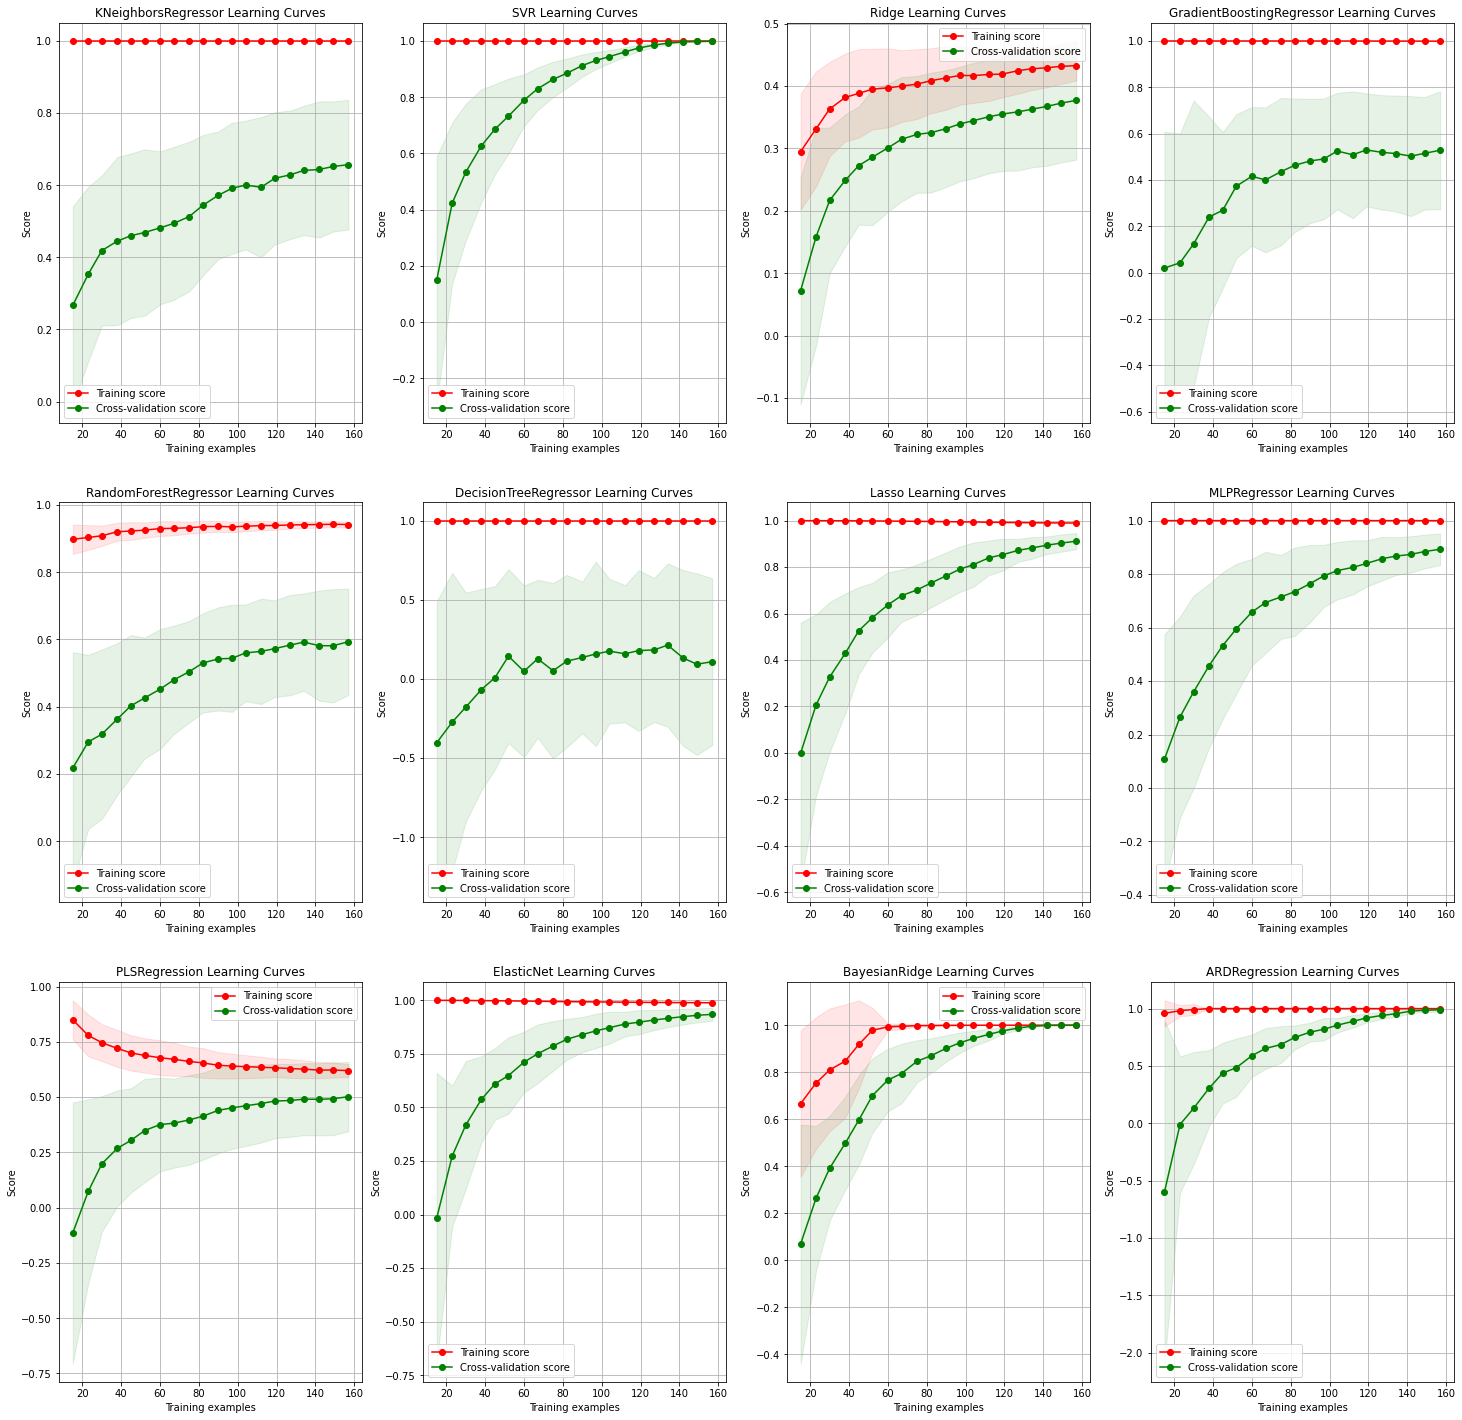

In [44]:
fig, axes = plt.subplots(3, 4, figsize=(25, 25))
axes=axes.reshape((1,12))
title = " Learning Curves"#输入标题
cv = ShuffleSplit(n_splits=100, test_size=0.2)#迭代次数，测试集的比例
from sklearn.pipeline import make_pipeline
for k,(name,estor) in zip(np.arange(12),new_estimators_ard):
    piple= make_pipeline(scaler,estor)
    plot_learning_curve(piple, name+title, x_ard, y, axes=axes[:,k],cv=cv, n_jobs=2,train_sizes=np.linspace(.1, 1.0, 20))#运行函数

## 拟合时间

In [45]:
def mchine_learn_amount_scaler_score(x,y,estimator,number=100):
    #estimator:元组形式，导入的机器学习算法。nun,mum：要绘多少图，几行即列,aa,bb:图像大小,number:抽样次数
    #求子模型于绘图
    estimator=estimator
    num=[]
    k=0
    num.append((k,'estimator','Score','RMSE'))  
    for (name,estor)in estimator:
        k=k+1    
        ms=np.zeros((1,number))
        Sco=np.zeros((1,number))
        #208个测试数据集
        from sklearn.model_selection import train_test_split
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        for i in range(number):
            x1_train,x1_test,y1_train,y1_test=train_test_split(x,y)
            scaler.fit(x1_train)
            x1_train_scaler=scaler.transform(x1_train)
            x1_test_scaler=scaler.transform(x1_test)
            estor.fit(x1_train_scaler,y1_train)
            Sco[:,i]=estor.score(x1_test_scaler,y1_test)
            y_pr=estor.predict(x1_test_scaler).reshape(len(y1_test),)
            ms[:,i]=mean_squared_error(y1_test,y_pr,squared=False)
        print(name)    
        print(Sco) 
       # y_pred=y_p.mean(axis=1)
        Score=Sco.mean()
        mse=ms.mean()        
        print(Score)
        print(mse)  
    return Score

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline




def plot_fittime_curve1(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    #train_sizes=用于交叉验证的的样本中训练集的数量
  
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print("===================")
    print(name)
    print(fit_times_mean)
    print("===================")
   
    

    # Plot fit_time vs score
    axes[0].grid()
    axes[0].plot(fit_times_mean, SCO1, 'o', label=r'select after ')
    axes[0].legend(loc='lower left',fontsize=15)
    axes[0].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[0].set_xlabel("fit_times")
    axes[0].set_ylabel("Score")
    axes[0].set_title("Performance of "+name)

    return plt

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline




def plot_fittime_curve2(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    #train_sizes=用于交叉验证的的样本中训练集的数量
  
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print("===================")
    print(name)
    print(fit_times_mean)
    print("===================")
   
    

    # Plot fit_time vs score
    axes[0].grid()
    axes[0].plot(fit_times_mean, SCO2, 'o', label=r'select before ')
    axes[0].legend(loc='lower left',fontsize=15)
    axes[0].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[0].set_xlabel("fit_times",size=20)
    axes[0].set_ylabel("Score",size=20)
    axes[0].set_title("Performance of "+name)

    return plt

KNeighborsRegressor
[[0.72494657 0.92558982 0.81996727 0.63097905 0.86665339 0.94386168
  0.69559056 0.81452252 0.33466775 0.54438472 0.74929724 0.77854779
  0.72016263 0.66020863 0.83206917 0.95726337 0.47115551 0.48168002
  0.72860303 0.46595148 0.7432191  0.80516408 0.76418417 0.8159792
  0.40395927 0.69466754 0.48366634 0.6948464  0.70879003 0.67266379
  0.81004703 0.60192335 0.68050506 0.66315347 0.64391931 0.76518089
  0.76551521 0.78566897 0.73690313 0.54526309 0.66654756 0.86866236
  0.67909969 0.70709239 0.84945412 0.41995062 0.73180308 0.85593595
  0.72635753 0.68207559]]
0.7023660106874848
8.626730457646783
KNeighborsRegressor
[[ 0.70877294 -0.02747146  0.74394915  0.7217197   0.69888254  0.60174938
   0.43233687  0.52856413  0.86865197  0.87045455  0.64981774  0.60822349
   0.67879316  0.70027595  0.67984803  0.63481878  0.71536271  0.3401518
   0.74284376  0.73846125  0.63099327  0.66977691  0.6697559   0.820411
   0.76809289  0.62258559  0.7444128   0.37288516  0.79496689

DecisionTreeRegressor
[0.00693284]
DecisionTreeRegressor
[0.14291748]


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.03564119636894, tolerance: 3.50023537332578
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233.50183642468846, tolerance: 3.5897983615520856
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.5620507683029, tolerance: 4.265335245792678
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347.49694700477585, tolerance: 3.582734329104764
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 945.2680471736799, tolerance: 4.367459965872456
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.2531842825188, tolerance: 4.076110294266234
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not co

Lasso
[[0.83012324 0.70515052 0.74499764 0.79299419 0.8073917  0.7658262
  0.77880196 0.81282084 0.72056982 0.73877961 0.69809358 0.7748423
  0.80502641 0.85810055 0.85011631 0.82298534 0.81097685 0.81813598
  0.77138535 0.66319757 0.80456531 0.85295134 0.71161933 0.68942836
  0.77985499 0.77613347 0.82403786 0.86180932 0.73990841 0.6071277
  0.81180238 0.76023604 0.87468318 0.68495631 0.51627358 0.66412552
  0.77524195 0.73931819 0.83243358 0.89434765 0.76170135 0.84026419
  0.8064947  0.7488013  0.79666967 0.71041072 0.7833936  0.80166369
  0.68421125 0.7618839 ]]
0.7693332960860944
7.771782848429428


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.02442169805454, tolerance: 3.8358286606376235
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.24158466632707, tolerance: 3.957921628362476
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.970235003359, tolerance: 4.136326052477067
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.67658649241775, tolerance: 3.132206431870302
  model = cd_fast.enet_coordinate_descent(


Lasso
[[0.86477327 0.5866457  0.63058155 0.78800768 0.76512711 0.70419893
  0.89973724 0.76175816 0.84701316 0.79440376 0.80949733 0.78449384
  0.78130914 0.74654025 0.75729636 0.68149762 0.74675963 0.88926465
  0.79335753 0.61295236 0.65106008 0.59459293 0.82123525 0.74304652
  0.57804227 0.87054595 0.8639797  0.81587282 0.83989342 0.75661053
  0.72565362 0.82770377 0.778519   0.82942585 0.83321673 0.8396894
  0.74961134 0.79669087 0.8319623  0.60677759 0.85932912 0.82486472
  0.7818363  0.79106186 0.85731319 0.81665447 0.49235104 0.89838195
  0.83454322 0.74186629]]
0.7699509470984455
7.716093484508445
Lasso
[0.01081416]
Lasso
[0.19124999]


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Conve

MLPRegressor
[[0.90878761 0.88279299 0.91737352 0.72504305 0.82758293 0.81934459
  0.86821503 0.77396248 0.84265791 0.88768388 0.90874776 0.93882933
  0.83274913 0.84022586 0.73192273 0.87372919 0.93092865 0.92678643
  0.82049426 0.48192083 0.92499948 0.5001011  0.84864211 0.67984761
  0.93399814 0.95669647 0.87386078 0.54184915 0.69052771 0.81349341
  0.80848302 0.57783661 0.80054984 0.9459785  0.85948475 0.93683171
  0.87050043 0.87202397 0.86356113 0.67686631 0.62860248 0.95382048
  0.86758637 0.82042404 0.85266921 0.67877508 0.73053665 0.9190956
  0.9231359  0.66203876]]
0.8150518995553645
6.634663558849775


D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Coding\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

MLPRegressor
[[0.94651667 0.81936726 0.84383353 0.81626419 0.83949684 0.90072803
  0.94938935 0.87127294 0.95520122 0.94589844 0.90670228 0.90188064
  0.94540397 0.88078245 0.7761968  0.90174969 0.78371296 0.8692927
  0.93314441 0.93750476 0.8121033  0.95045543 0.84833179 0.91413421
  0.92799943 0.93241858 0.89743544 0.90736414 0.86540961 0.87348081
  0.91999227 0.95377895 0.93628474 0.94221886 0.94312024 0.67983909
  0.72896205 0.85757004 0.94673745 0.84928026 0.72775855 0.89542931
  0.92911246 0.84560328 0.91114486 0.93124512 0.67692838 0.82874591
  0.88245678 0.67847138]]
0.8743630372957156
5.49209780253411
MLPRegressor
[0.09352466]
MLPRegressor
[12.21216458]
PLSRegression
[[0.33614314 0.4729347  0.81625352 0.63002869 0.51874671 0.32321619
  0.45852737 0.66963172 0.50115729 0.67625191 0.51944524 0.71323162
  0.4634261  0.36882874 0.6954579  0.33088925 0.17858697 0.35049284
  0.25372279 0.65210438 0.49746577 0.54393945 0.75185839 0.53101904
  0.63292705 0.07500848 0.55037648 0.510765

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 951.543243358969, tolerance: 4.395092737288
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.26017134502536, tolerance: 3.937962861423405
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.7260289127216, tolerance: 4.011451068171131
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not conver

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.6933202812479, tolerance: 4.097774465341299
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1140.581317172141, tolerance: 4.175894058550301
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.596123035039, tolerance: 3.4809946327946473
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not con

ElasticNet
[[0.67673781 0.62539498 0.85269566 0.63760808 0.89633155 0.80329938
  0.74866142 0.72533022 0.78862403 0.77444387 0.65985735 0.70039988
  0.88536407 0.82663418 0.8061161  0.74061295 0.83671171 0.64636938
  0.83657085 0.76273239 0.7869557  0.81379738 0.83538502 0.81035393
  0.79036591 0.66065306 0.84156567 0.73651362 0.82673355 0.78103108
  0.77610163 0.82504255 0.79308949 0.77548113 0.79056827 0.79764284
  0.67365396 0.8786417  0.83306789 0.82374494 0.64169888 0.58721564
  0.73591471 0.80431014 0.7965738  0.80176194 0.78931385 0.73859606
  0.74733607 0.79061956]]
0.7702845174078979
7.789604627310078


D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4191.840814084472, tolerance: 3.948300166735567
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3759.8674272788567, tolerance: 3.925918884366518
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4248.396448144854, tolerance: 4.1092037729780655
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3999.957022297569, tolerance: 3.575204184129859
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3852.4225066240197, tolerance: 3.9311250982287036
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4247.261166512038, tolerance: 3.767661237167132
  model = cd_fast.enet_coordinate_descent(
D:\Coding\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

ElasticNet
[[0.805052   0.73292041 0.69653447 0.74937201 0.73636423 0.76542727
  0.74989164 0.74756231 0.70238659 0.84229141 0.80904913 0.76456295
  0.74150179 0.67597378 0.40499179 0.74005769 0.77851495 0.76617732
  0.71705486 0.69227238 0.54775951 0.72705984 0.71465907 0.71487725
  0.78735972 0.84191347 0.8265683  0.82628783 0.84896472 0.69634978
  0.67936954 0.73029672 0.75825881 0.72803483 0.7700957  0.61012557
  0.81927881 0.73326492 0.85453196 0.70358014 0.83362889 0.83429033
  0.7593987  0.74735987 0.74589423 0.59739485 0.75981597 0.76467835
  0.71133038 0.63104619]]
0.7384286646203353
8.259175461627809
ElasticNet
[0.01169637]
ElasticNet
[0.32544521]
BayesianRidge
[[0.99977393 0.99939499 0.99956131 0.99976873 0.99920644 0.99953155
  0.999492   0.99961311 0.99901546 0.99956617 0.9997941  0.99964236
  0.99959708 0.99965239 0.9995182  0.99940573 0.999613   0.99968351
  0.99943653 0.99978056 0.99967769 0.99967711 0.99983979 0.9996135
  0.99971772 0.99975149 0.99963387 0.99963616 0.9

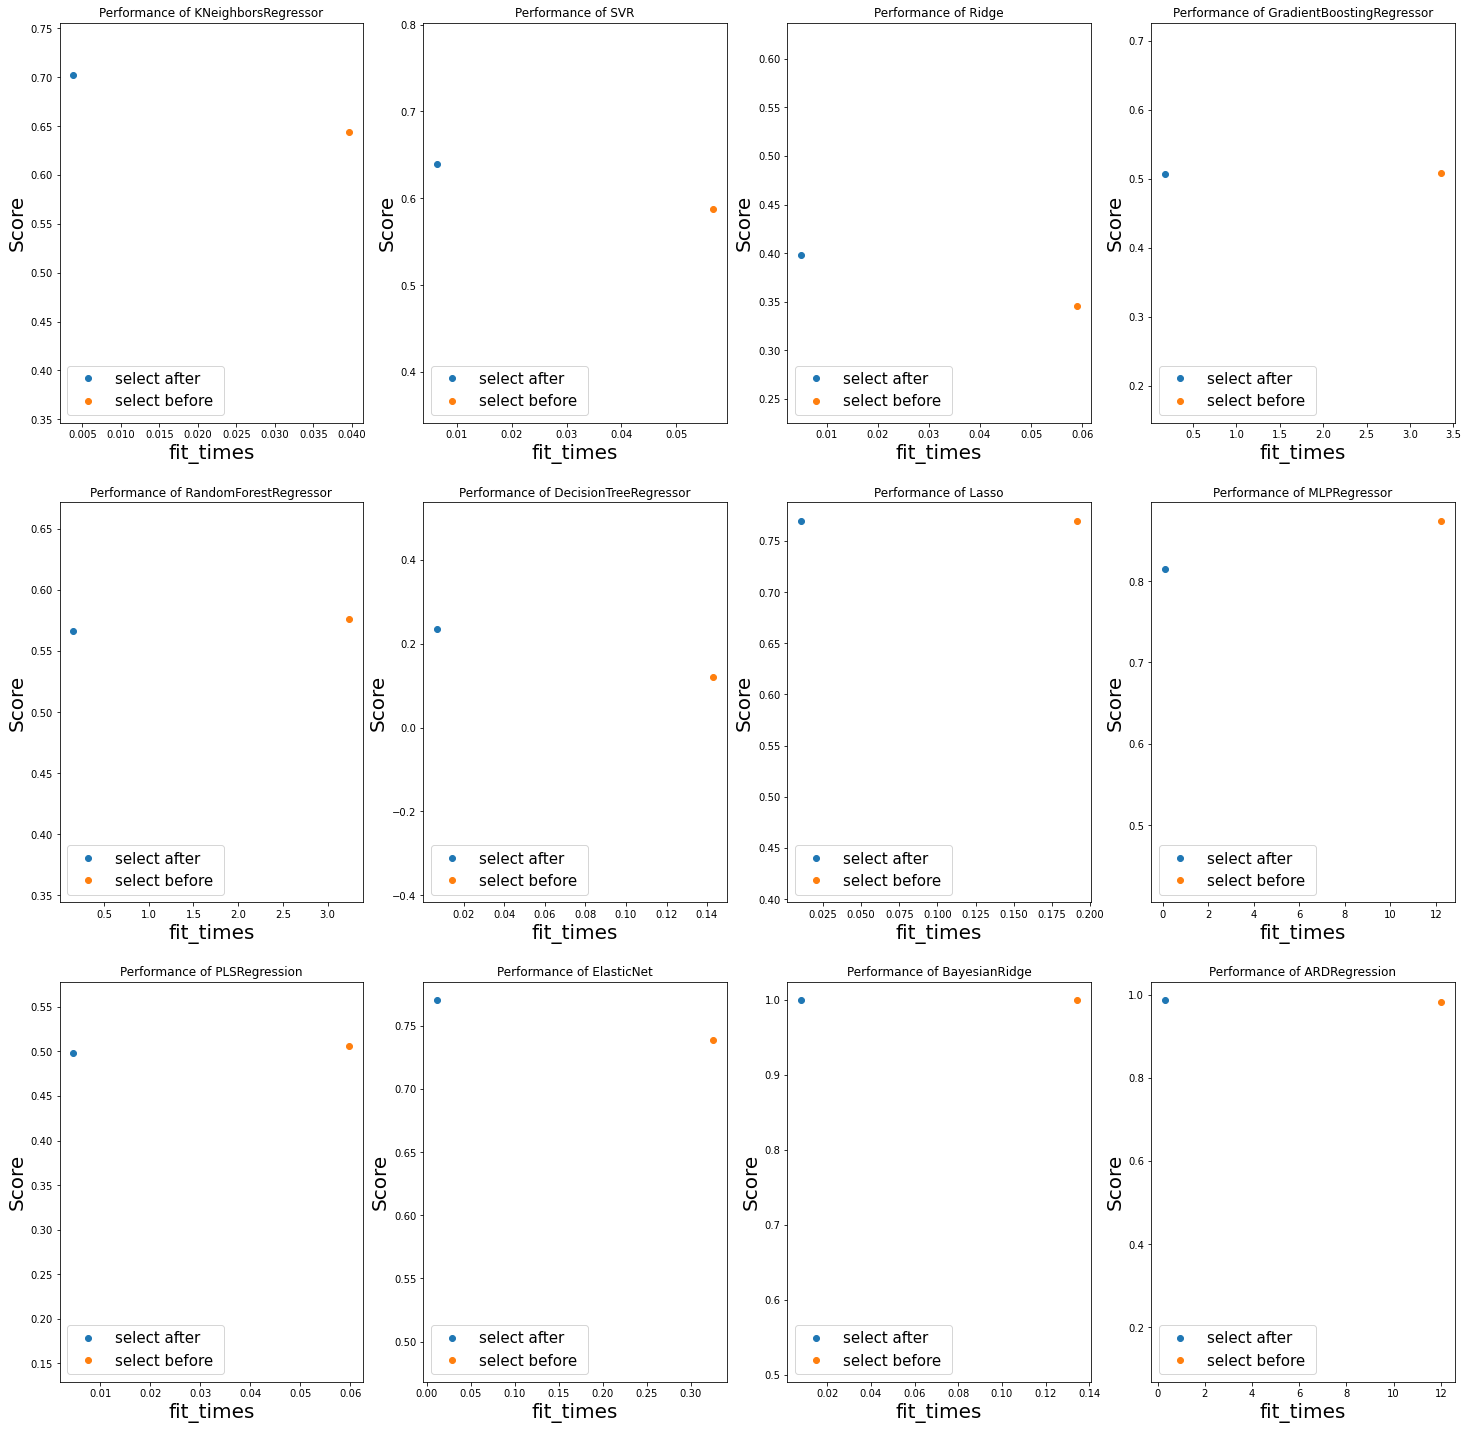

In [48]:
fig, axes = plt.subplots(3, 4, figsize=(25, 25))
axes=axes.reshape((1,12))
#title = " Learning Curves"#输入标题
cv = ShuffleSplit(n_splits=80, test_size=0.35)#迭代次数，测试集的比例
from sklearn.pipeline import make_pipeline
for k,(name,estor),(oldname,oldestor) in zip(np.arange(12),new_estimators_reg,estimator):
    SCO1=mchine_learn_amount_scaler_score(x_ard,y,[(name,estor)],number=50)
    SCO2=mchine_learn_amount_scaler_score(x_ard,y,[(oldname,oldestor)],number=50)
    piple= make_pipeline(scaler,estor)
    piple2= make_pipeline(scaler,oldestor)
    plot_fittime_curve1(piple, name, x_reg, y, axes=axes[:,k],cv=cv, n_jobs=2,train_sizes=np.linspace(.7, 1.0, 1))#运行函数
    plot_fittime_curve2(piple2, oldname, x, y, axes=axes[:,k],cv=cv, n_jobs=2,train_sizes=np.linspace(.7, 1.0, 1))#运行函数

In [67]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
from sklearn.svm import SVR
svr = SVR(C=7, degree=1, gamma=10, kernel='poly')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ard,y)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaler=scaler.transform(x)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

bay.fit(x_train_scaler,y_train)
print(bay.score(x_train_scaler,y_train))
print(bay.score(x_test_scaler,y_test))


0.9999182800500207
0.9974113907740109


In [74]:
y_predict = bay.predict(x_test_scaler)
y_predict

array([ 8.06992964e-01,  2.25793575e+01,  5.09863742e-01,  6.41808494e-01,
        7.14298870e+00,  3.53665584e+00, -2.57543969e-01,  3.94568537e+00,
        7.79925545e-01,  3.90293058e+00,  2.44973440e+00,  6.30989920e+00,
       -9.33330389e-02,  1.79295599e+00,  3.91511227e+01,  3.33446132e+00,
        3.23109089e+00,  1.26214034e+00,  2.12286388e+00,  1.14383026e+01,
        7.85337830e-01,  2.17172526e+00,  2.95921064e+01,  1.84116947e+00,
        2.23492205e+01,  1.07323125e+00,  3.61329301e+01,  2.79245007e+01,
        1.70395752e+00,  7.93142747e+01,  3.78308403e+01,  2.83334934e+00,
        8.82960574e+00,  1.42120780e+00,  2.51038064e+01,  3.67099763e+00,
        1.96632585e+00,  7.01848354e-01,  7.93754292e+00,  5.40328257e+00,
        4.42453365e-01,  1.80526199e-01,  6.60718988e-01,  1.50149819e+01,
        3.09244753e+01,  1.53681183e-02,  4.71575200e+00,  7.11879357e-01,
        2.28355012e+00,  1.66819325e-01,  1.83119088e+01,  3.15305975e+01,
        8.99807550e-01,  

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5743275621784627
R^2 Score: 0.9974113907740109


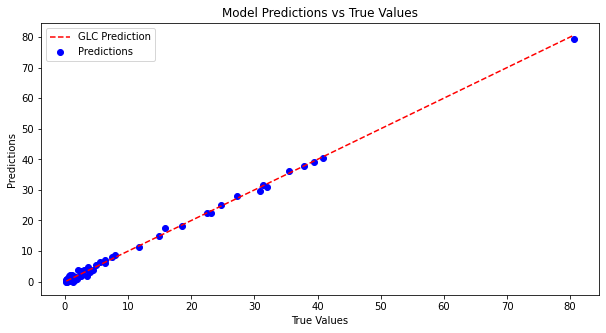

In [70]:
# 可视化
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_predict, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='GLC Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()

In [72]:
column_headers = x_ard.columns.tolist()

#data_predict=pd.read_excel('data_predict.xlsx')

y_ture = glc.iloc[197:,3251]
data_predict=glc.iloc[197:,:3251]
x_predict = data_predict[column_headers]
x_predict

3017     2984     2904     2899     2896     2879     2863     2819  \
197 -1.07707 -1.06527 -1.03610 -1.03554 -1.03389 -1.02888 -1.02376 -1.00896   
198 -1.09745 -1.08518 -1.05352 -1.05177 -1.05128 -1.04561 -1.03979 -1.02404   
199 -1.09968 -1.08742 -1.05563 -1.05468 -1.05321 -1.04781 -1.04247 -1.02586   
200 -1.10119 -1.08835 -1.05707 -1.05606 -1.05382 -1.04805 -1.04295 -1.02610   
201 -1.10175 -1.08956 -1.05847 -1.05681 -1.05540 -1.04935 -1.04385 -1.02643   
202 -1.10073 -1.08856 -1.05758 -1.05555 -1.05549 -1.04874 -1.04286 -1.02608   
203 -1.10178 -1.08926 -1.05822 -1.05714 -1.05619 -1.04965 -1.04326 -1.02618   
204 -1.10049 -1.08852 -1.05773 -1.05646 -1.05520 -1.04879 -1.04299 -1.02644   
205 -1.10167 -1.08873 -1.05834 -1.05604 -1.05541 -1.04898 -1.04381 -1.02651   
206 -1.10129 -1.08934 -1.05827 -1.05706 -1.05538 -1.04950 -1.04272 -1.02677   
207 -1.10182 -1.08983 -1.05888 -1.05768 -1.05612 -1.05006 -1.04467 -1.02685   
208 -1.10243 -1.09018 -1.05921 -1.05758 -1.05606 -1.05022 -1.04389 -1.02706   
209 -1.10230 -1.09059 -1.05929 -1.05816 -1.05710 -1.05069 -1.04382 -1.02682   
210 -1.10203 -1.09030 -1.05889 -1.05690 -1.05598 -1.04985 -1.04420 -1.02675   
211 -1.10276 -1.09051 -1.05951 -1.05728 -1.05593 -1.04983 -1.04395 -1.02726   
212 -1.10108 -1.08868 -1.05806 -1.05619 -1.05513 -1.04895 -1.04262 -1.02636   
213 -1.10182 -1.08923 -1.05816 -1.05646 -1.05523 -1.04915 -1.04339 -1.02605   
214 -1.09574 -1.08355 -1.05348 -1.05170 -1.05124 -1.04422 -1.03941 -1.02238   
215 -1.09615 -1.08480 -1.05507 -1.05311 -1.05206 -1.04564 -1.03895 -1.02284   
216 -1.09723 -1.08534 -1.05466 -1.05320 -1.05214 -1.04572 -1.03966 -1.02418   
217 -1.09425 -1.08241 -1.05238 -1.05045 -1.04997 -1.04380 -1.03792 -1.02165   
218 -1.09600 -1.08373 -1.05317 -1.05222 -1.05085 -1.04455 -1.03870 -1.02342   
219 -1.09578 -1.08427 -1.05394 -1.05282 -1.05143 -1.04560 -1.03959 -1.02438   
220 -1.09759 -1.08494 -1.05470 -1.05229 -1.05109 -1.04565 -1.04021 -1.02506   
221 -1.09831 -1.08595 -1.05465 -1.05278 -1.05201 -1.04602 -1.04052 -1.02480   
222 -1.09880 -1.08679 -1.05613 -1.05433 -1.05224 -1.04707 -1.04167 -1.02588   
223 -1.09918 -1.08686 -1.05519 -1.05411 -1.05311 -1.04716 -1.04189 -1.02595   
224 -1.10008 -1.08753 -1.05672 -1.05539 -1.05438 -1.04854 -1.04306 -1.02632   
225 -1.10149 -1.08912 -1.05927 -1.05581 -1.05525 -1.05008 -1.04419 -1.02766   
226 -1.10329 -1.09108 -1.06014 -1.05853 -1.05766 -1.05190 -1.04585 -1.02933   
227 -1.10497 -1.09146 -1.06040 -1.05990 -1.05858 -1.05227 -1.04661 -1.02988   
228 -1.10482 -1.09229 -1.06094 -1.05863 -1.05784 -1.05231 -1.04656 -1.02967   
229 -1.10444 -1.09274 -1.06063 -1.05882 -1.05799 -1.05172 -1.04578 -1.03001   
230 -1.10613 -1.09315 -1.06180 -1.06032 -1.05958 -1.05385 -1.04774 -1.03140   
231 -1.10618 -1.09356 -1.06243 -1.06044 -1.05900 -1.05381 -1.04735 -1.03158   
232 -1.10839 -1.09613 -1.06439 -1.06235 -1.06144 -1.05610 -1.05027 -1.03373   
233 -1.10911 -1.09792 -1.06492 -1.06352 -1.06209 -1.05599 -1.04996 -1.03338   
234 -1.11008 -1.09734 -1.06542 -1.06346 -1.06252 -1.05683 -1.05022 -1.03368   
235 -1.11062 -1.09751 -1.06568 -1.06389 -1.06326 -1.05711 -1.05055 -1.03434   
236 -1.11012 -1.09782 -1.06637 -1.06424 -1.06399 -1.05700 -1.05092 -1.03422   
237 -1.11125 -1.09846 -1.06581 -1.06506 -1.06356 -1.05765 -1.05202 -1.03461   
238 -1.11336 -1.10057 -1.06774 -1.06583 -1.06566 -1.05966 -1.05254 -1.03596   
239 -1.11373 -1.10179 -1.06909 -1.06632 -1.06522 -1.05980 -1.05346 -1.03730   
240 -1.11461 -1.10209 -1.06949 -1.06790 -1.06691 -1.05994 -1.05375 -1.03712   
241 -1.11430 -1.10139 -1.06962 -1.06752 -1.06685 -1.05971 -1.05495 -1.03699   

         2782      2778  ...     435      434      387      370      349   \
197 -0.995223 -0.993181  ...  1.76877  1.76811  1.71301  1.71378  1.71684   
198 -1.008820 -1.007080  ...  1.74362  1.74454  1.67768  1.68055  1.68065   
199 -1.009900 -1.008180  ...  1.73895  1.73871  1.67702  1.67882  1.67682   
200 -1.010640 -1.009610  ...  1.73622  1.73446  1.66863  1.67333 

In [73]:
y_predict = bay.predict(x_predict)
y_predict

array([100.18545062, 100.0385425 , 100.08495012, 100.11537048,
       100.12392181, 100.21358931, 100.15528911, 100.19967297,
       100.11478985, 100.27935214, 100.20412256, 100.24663177,
       100.17009162, 100.19735623, 100.27693834, 100.29075565,
       100.25564288, 100.28222019, 100.23326579, 100.31274044,
       100.2936536 , 100.30531965, 100.26074901, 100.37197389,
       100.35033706, 100.17006271, 100.24407088, 100.15118471,
       100.06621711, 100.07561454, 100.13815187, 100.18960333,
       100.25323359, 100.20228279, 100.21523459, 100.23160228,
       100.37080698, 100.2754699 , 100.28777827, 100.31525016,
       100.33949537, 100.32830191, 100.30624684, 100.36054025,
       100.2941767 ])

In [66]:
# 计算性能指标
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_ture, y_predict)
r2 = r2_score(y_ture, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 191.63474530222737
R^2 Score: -20.31236554055352


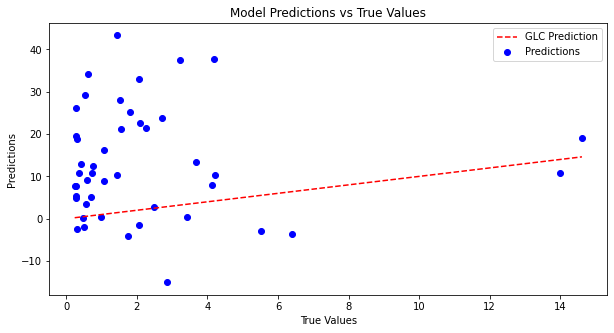

In [45]:
# 可视化
plt.figure(figsize=(10, 5))
plt.scatter(y_ture, y_predict, color='blue', label='Predictions')
plt.plot([y_ture.min(), y_ture.max()], [y_ture.min(), y_ture.max()], color='red', linestyle='--', label='GLC Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()

In [18]:
x_ard

3221     3119     3017     2997     2973     2968     2909     2899  \
0   -1.13404 -1.11515 -1.08933 -1.08300 -1.07420 -1.07299 -1.04995 -1.04600   
1   -1.13766 -1.11831 -1.09216 -1.08591 -1.07728 -1.07522 -1.05227 -1.04917   
2   -1.13918 -1.12049 -1.09418 -1.08640 -1.07775 -1.07557 -1.05284 -1.04974   
3   -1.14135 -1.12210 -1.09467 -1.08786 -1.08004 -1.07752 -1.05468 -1.05181   
4   -1.14381 -1.12443 -1.09661 -1.09023 -1.08185 -1.07962 -1.05664 -1.05403   
..       ...      ...      ...      ...      ...      ...      ...      ...   
192 -1.15813 -1.13661 -1.10726 -1.10062 -1.09181 -1.08980 -1.06756 -1.06407   
193 -1.16440 -1.14283 -1.11256 -1.10568 -1.09684 -1.09573 -1.07272 -1.06903   
194 -1.16009 -1.13930 -1.10972 -1.10292 -1.09394 -1.09241 -1.06969 -1.06584   
195 -1.15970 -1.13899 -1.10980 -1.10267 -1.09341 -1.09177 -1.06913 -1.06575   
196 -1.16271 -1.14244 -1.11219 -1.10517 -1.09626 -1.09433 -1.07141 -1.06854   

        2890     2857  ...     461      451      434      387      383   \
0   -1.04364 -1.03211  ...  1.75177  1.75702  1.76931  1.70175  1.70170   
1   -1.04613 -1.03494  ...  1.74957  1.75333  1.76522  1.69480  1.69546   
2   -1.04723 -1.03611  ...  1.72336  1.72566  1.73933  1.69346  1.69659   
3   -1.04939 -1.03685  ...  1.73719  1.74211  1.76055  1.70000  1.70412   
4   -1.05136 -1.03858  ...  1.73619  1.74063  1.75875  1.69254  1.69633   
..       ...      ...  ...      ...      ...      ...      ...      ...   
192 -1.06072 -1.04636  ...  1.73011  1.72906  1.73653  1.65736  1.65895   
193 -1.06620 -1.05107  ...  1.72172  1.71767  1.72911  1.64212  1.64644   
194 -1.06312 -1.04957  ...  1.72731  1.72590  1.73621  1.65310  1.65256   
195 -1.06249 -1.04916  ...  1.73358  1.72701  1.73909  1.65600  1.65844   
196 -1.06495 -1.05169  ...  1.71037  1.71453  1.72925  1.65984  1.66268   

        347      244      235      193      176   
0    1.68321  1.58853  1.57125  1.47824  1.45450  
1    1.67768  1.58152  1.55990  1.47201  1.44516  
2    1.68901  1.56105  1.54149  1.43677  1.41088  
3    1.68100  1.54968  1.53576  1.44865  1.43177  
4    1.67670  1.54345  1.52826  1.44022  1.42006  
..       ...      ...      ...      ...      ...  
192  1.63730  1.52868  1.50988  1.39903  1.34396  
193  1.61811  1.50997  1.49032  1.38305  1.33176  
194  1.62748  1.51055  1.49126  1.38412  1.33556  
195  1.63411  1.50159  1.49023  1.38225  1.33277  
196  1.63591  1.48107  1.46518  1.36607  1.32308  

[197 rows x 136 columns]

In [19]:
column_headers = x_ard.columns.tolist()
column_headers

[3221,
 3119,
 3017,
 2997,
 2973,
 2968,
 2909,
 2899,
 2890,
 2857,
 2819,
 2815,
 2812,
 2759,
 2736,
 2694,
 2693,
 2680,
 2679,
 2638,
 2631,
 2613,
 2540,
 2475,
 2450,
 2445,
 2430,
 2426,
 2425,
 2391,
 2384,
 2351,
 2304,
 2246,
 2217,
 2215,
 2195,
 2188,
 2159,
 2138,
 2116,
 2088,
 2055,
 2049,
 2007,
 1999,
 1969,
 1944,
 1917,
 1910,
 1839,
 1836,
 1821,
 1820,
 1811,
 1794,
 1782,
 1760,
 1737,
 1726,
 1722,
 1714,
 1609,
 1601,
 1600,
 1593,
 1590,
 1586,
 1582,
 1568,
 1457,
 1454,
 1450,
 1435,
 1431,
 1430,
 1351,
 1327,
 1293,
 1282,
 1240,
 1229,
 1224,
 1212,
 1191,
 1166,
 1162,
 1155,
 1142,
 1086,
 1051,
 1042,
 1002,
 991,
 979,
 963,
 952,
 927,
 906,
 901,
 867,
 842,
 824,
 818,
 808,
 806,
 783,
 752,
 737,
 726,
 674,
 669,
 662,
 661,
 650,
 595,
 570,
 561,
 550,
 542,
 529,
 524,
 519,
 497,
 480,
 470,
 461,
 451,
 434,
 387,
 383,
 347,
 244,
 235,
 193,
 176]